# Table of contents

- Download latest data
- Retrain model
- Display current squad
- Use model to identify transfers
- Identify playing 11
- Show top performers by position

In [1]:
import pandas as pd
import torch
import numpy as np
import random
from random import shuffle
np.random.seed(17)
random.seed(17)
torch.manual_seed(17)
import wget
import os
import aiohttp
import asyncio
from fpl import FPL
from torch.utils.data import TensorDataset, DataLoader
from player import Player
from team import Team
from data_processor import get_fpl, get_current_squad, get_latest_game_week
from agent import Agent
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
import pytorch_lightning as pl


## Download latest data, train model and save model.

In [2]:
model_type = "linear"
features = ["total_points", "ict_index", "clean_sheets", "saves", "assists", "was_home","goals_scored"]
logger = pl.loggers.TensorBoardLogger(f"lightning_logs/model_comparison/{model_type}")
trainer = pl.Trainer(max_epochs=50, gpus=torch.cuda.device_count(), logger=logger,  callbacks=[EarlyStopping(monitor="val_loss")])
gameweek = get_latest_game_week()
agent = Agent(features, epochs=1, window=6, model_type=model_type, gameweek=gameweek, trial_run=True)
await agent.get_data()
await agent.update_model(trainer)

GPU available: True, used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


/home/ajrfhp/anaconda3/envs/test/lib/python3.8/site-packages/pandas/core/frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/home/ajrfhp/Control/Control_FPL/data_processor.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_player_features["total_points"] = all_player_features["total_points"].clip(0, max_player_points)


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



  | Name  | Type        | Params
--------------------------------------
0 | model | LinearModel | 43    
--------------------------------------
43        Trainable params
0         Non-trainable params
43        Total params
0.000     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Validation sanity check:   0%|                                                                    | 0/2 [00:00<?, ?it/s]

Validation sanity check:  50%|██████████████████████████████                              | 1/2 [00:01<00:01,  1.92s/it]

/home/ajrfhp/anaconda3/envs/test/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:322: UserWarning: The number of training samples (15) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: -1it [00:00, ?it/s]

Training:   0%|                                                                       | 0/19 [00:00<00:00, 21620.12it/s]

Epoch 0:   0%|                                                                         | 0/19 [00:00<00:00, 1181.49it/s]

Epoch 0:   5%|███▉                                                                       | 1/19 [00:01<00:15,  1.19it/s]

Epoch 0:   5%|██▊                                                   | 1/19 [00:01<00:15,  1.19it/s, loss=2.55, v_num=74]

Epoch 0:  11%|█████▋                                                | 2/19 [00:01<00:09,  1.76it/s, loss=2.44, v_num=74]

Epoch 0:  16%|████████▌                                             | 3/19 [00:01<00:06,  2.31it/s, loss=2.45, v_num=74]

Epoch 0:  21%|███████████▎                                          | 4/19 [00:01<00:05,  2.83it/s, loss=2.46, v_num=74]

Epoch 0:  26%|██████████████▏                                       | 5/19 [00:01<00:04,  3.35it/s, loss=2.46, v_num=74]

Epoch 0:  26%|██████████████▏                                       | 5/19 [00:01<00:04,  3.35it/s, loss=2.46, v_num=74]

Epoch 0:  32%|█████████████████                                     | 6/19 [00:01<00:03,  3.89it/s, loss=2.45, v_num=74]

Epoch 0:  37%|███████████████████▉                                  | 7/19 [00:01<00:02,  4.42it/s, loss=2.43, v_num=74]

Epoch 0:  42%|██████████████████████▋                               | 8/19 [00:01<00:02,  4.95it/s, loss=2.42, v_num=74]

Epoch 0:  47%|█████████████████████████▌                            | 9/19 [00:01<00:01,  5.47it/s, loss=2.42, v_num=74]

Epoch 0:  53%|████████████████████████████▍                         | 10/19 [00:01<00:01,  5.99it/s, loss=2.4, v_num=74]

Epoch 0:  58%|██████████████████████████████▋                      | 11/19 [00:01<00:01,  6.49it/s, loss=2.38, v_num=74]

Epoch 0:  63%|█████████████████████████████████▍                   | 12/19 [00:01<00:01,  6.98it/s, loss=2.38, v_num=74]

Epoch 0:  68%|████████████████████████████████████▎                | 13/19 [00:01<00:00,  7.48it/s, loss=2.36, v_num=74]

Epoch 0:  74%|███████████████████████████████████████              | 14/19 [00:01<00:00,  7.98it/s, loss=2.35, v_num=74]

Epoch 0:  79%|█████████████████████████████████████████▊           | 15/19 [00:02<00:00,  7.88it/s, loss=2.35, v_num=74]

Epoch 0:  79%|█████████████████████████████████████████▊           | 15/19 [00:02<00:00,  7.88it/s, loss=2.31, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:01<00:03,  1.07s/it]

Epoch 0: 100%|█████████████████████████████████████████████████████| 19/19 [00:03<00:00,  5.75it/s, loss=2.31, v_num=74]

Epoch 0:   0%|                                                   | 0/19 [00:00<00:00, 23831.27it/s, loss=2.31, v_num=74]

Epoch 1:   0%|                                                     | 0/19 [00:00<00:00, 524.09it/s, loss=2.31, v_num=74]

Epoch 1:   5%|██▉                                                    | 1/19 [00:01<00:14,  1.27it/s, loss=2.3, v_num=74]

Epoch 1:  11%|█████▋                                                | 2/19 [00:01<00:10,  1.68it/s, loss=2.27, v_num=74]

Epoch 1:  16%|████████▌                                             | 3/19 [00:01<00:07,  2.20it/s, loss=2.25, v_num=74]

Epoch 1:  21%|███████████▎                                          | 4/19 [00:01<00:05,  2.67it/s, loss=2.24, v_num=74]

Epoch 1:  26%|██████████████▏                                       | 5/19 [00:01<00:04,  3.20it/s, loss=2.23, v_num=74]

Epoch 1:  32%|█████████████████▎                                     | 6/19 [00:01<00:03,  3.66it/s, loss=2.2, v_num=74]

Epoch 1:  37%|███████████████████▉                                  | 7/19 [00:01<00:02,  4.17it/s, loss=2.18, v_num=74]

Epoch 1:  42%|██████████████████████▋                               | 8/19 [00:01<00:02,  4.66it/s, loss=2.15, v_num=74]

Epoch 1:  47%|█████████████████████████▌                            | 9/19 [00:01<00:01,  5.16it/s, loss=2.12, v_num=74]

Epoch 1:  53%|███████████████████████████▉                         | 10/19 [00:01<00:01,  5.65it/s, loss=2.12, v_num=74]

Epoch 1:  53%|███████████████████████████▉                         | 10/19 [00:01<00:01,  5.65it/s, loss=2.09, v_num=74]

Epoch 1:  58%|██████████████████████████████▋                      | 11/19 [00:01<00:01,  6.13it/s, loss=2.06, v_num=74]

Epoch 1:  63%|█████████████████████████████████▍                   | 12/19 [00:01<00:01,  6.60it/s, loss=2.04, v_num=74]

Epoch 1:  68%|████████████████████████████████████▎                | 13/19 [00:01<00:00,  7.08it/s, loss=2.01, v_num=74]

Epoch 1:  74%|███████████████████████████████████████              | 14/19 [00:01<00:00,  7.54it/s, loss=1.98, v_num=74]

Epoch 1:  79%|█████████████████████████████████████████▊           | 15/19 [00:02<00:00,  7.39it/s, loss=1.94, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:01<00:04,  1.59s/it]

Epoch 1: 100%|█████████████████████████████████████████████████████| 19/19 [00:04<00:00,  4.99it/s, loss=1.94, v_num=74]

Epoch 1:   0%|                                                   | 0/19 [00:00<00:00, 20360.70it/s, loss=1.94, v_num=74]

Epoch 2:   0%|                                                    | 0/19 [00:00<00:00, 1238.72it/s, loss=1.94, v_num=74]

Epoch 2:   5%|██▊                                                   | 1/19 [00:01<00:10,  1.75it/s, loss=1.91, v_num=74]

Epoch 2:  11%|█████▋                                                | 2/19 [00:01<00:06,  2.61it/s, loss=1.87, v_num=74]

Epoch 2:  16%|████████▌                                             | 3/19 [00:01<00:04,  3.40it/s, loss=1.85, v_num=74]

Epoch 2:  21%|███████████▎                                          | 4/19 [00:01<00:03,  4.21it/s, loss=1.82, v_num=74]

Epoch 2:  26%|██████████████▏                                       | 5/19 [00:01<00:02,  4.97it/s, loss=1.81, v_num=74]

Epoch 2:  32%|█████████████████                                     | 6/19 [00:01<00:02,  5.74it/s, loss=1.79, v_num=74]

Epoch 2:  37%|███████████████████▉                                  | 7/19 [00:01<00:01,  6.52it/s, loss=1.77, v_num=74]

Epoch 2:  42%|██████████████████████▋                               | 8/19 [00:01<00:01,  7.19it/s, loss=1.75, v_num=74]

Epoch 2:  47%|█████████████████████████▌                            | 9/19 [00:01<00:01,  7.82it/s, loss=1.74, v_num=74]

Epoch 2:  53%|███████████████████████████▉                         | 10/19 [00:01<00:01,  8.54it/s, loss=1.74, v_num=74]

Epoch 2:  53%|███████████████████████████▉                         | 10/19 [00:01<00:01,  8.53it/s, loss=1.71, v_num=74]

Epoch 2:  58%|██████████████████████████████▋                      | 11/19 [00:01<00:00,  9.15it/s, loss=1.69, v_num=74]

Epoch 2:  63%|█████████████████████████████████▍                   | 12/19 [00:01<00:00,  9.76it/s, loss=1.67, v_num=74]

Epoch 2:  68%|████████████████████████████████████▎                | 13/19 [00:01<00:00, 10.29it/s, loss=1.65, v_num=74]

Epoch 2:  74%|███████████████████████████████████████              | 14/19 [00:01<00:00, 10.98it/s, loss=1.63, v_num=74]

Epoch 2:  79%|██████████████████████████████████████████▋           | 15/19 [00:01<00:00, 10.15it/s, loss=1.6, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.11it/s]

Epoch 2: 100%|██████████████████████████████████████████████████████| 19/19 [00:02<00:00,  6.98it/s, loss=1.6, v_num=74]

Epoch 2:   0%|                                                    | 0/19 [00:00<00:00, 31775.03it/s, loss=1.6, v_num=74]

Epoch 3:   0%|                                                     | 0/19 [00:00<00:00, 1639.04it/s, loss=1.6, v_num=74]

Epoch 3:   5%|██▊                                                   | 1/19 [00:01<00:10,  1.66it/s, loss=1.58, v_num=74]

Epoch 3:  11%|█████▋                                                | 2/19 [00:01<00:06,  2.47it/s, loss=1.55, v_num=74]

Epoch 3:  16%|████████▌                                             | 3/19 [00:01<00:04,  3.26it/s, loss=1.54, v_num=74]

Epoch 3:  21%|███████████▎                                          | 4/19 [00:01<00:03,  4.05it/s, loss=1.52, v_num=74]

Epoch 3:  26%|██████████████▏                                       | 5/19 [00:01<00:02,  4.83it/s, loss=1.51, v_num=74]

Epoch 3:  32%|█████████████████▎                                     | 6/19 [00:01<00:02,  5.59it/s, loss=1.5, v_num=74]

Epoch 3:  37%|███████████████████▉                                  | 7/19 [00:01<00:01,  6.31it/s, loss=1.49, v_num=74]

Epoch 3:  42%|██████████████████████▋                               | 8/19 [00:01<00:01,  7.06it/s, loss=1.48, v_num=74]

Epoch 3:  47%|█████████████████████████▌                            | 9/19 [00:01<00:01,  7.80it/s, loss=1.47, v_num=74]

Epoch 3:  53%|███████████████████████████▉                         | 10/19 [00:01<00:01,  8.51it/s, loss=1.47, v_num=74]

Epoch 3:  53%|███████████████████████████▉                         | 10/19 [00:01<00:01,  8.50it/s, loss=1.45, v_num=74]

Epoch 3:  58%|██████████████████████████████▋                      | 11/19 [00:01<00:00,  9.22it/s, loss=1.43, v_num=74]

Epoch 3:  63%|█████████████████████████████████▍                   | 12/19 [00:01<00:00,  9.93it/s, loss=1.42, v_num=74]

Epoch 3:  68%|████████████████████████████████████▎                | 13/19 [00:01<00:00, 10.61it/s, loss=1.41, v_num=74]

Epoch 3:  74%|███████████████████████████████████████              | 14/19 [00:01<00:00, 11.31it/s, loss=1.39, v_num=74]

Epoch 3:  79%|█████████████████████████████████████████▊           | 15/19 [00:01<00:00, 11.01it/s, loss=1.37, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:01<00:03,  1.15s/it]

Epoch 3: 100%|█████████████████████████████████████████████████████| 19/19 [00:02<00:00,  6.95it/s, loss=1.37, v_num=74]

Epoch 3:   0%|                                                   | 0/19 [00:00<00:00, 23967.45it/s, loss=1.37, v_num=74]

Epoch 4:   0%|                                                    | 0/19 [00:00<00:00, 1450.31it/s, loss=1.37, v_num=74]

Epoch 4:   5%|██▊                                                   | 1/19 [00:01<00:09,  1.82it/s, loss=1.36, v_num=74]

Epoch 4:  11%|█████▋                                                | 2/19 [00:01<00:06,  2.66it/s, loss=1.34, v_num=74]

Epoch 4:  16%|████████▌                                             | 3/19 [00:01<00:04,  3.52it/s, loss=1.33, v_num=74]

Epoch 4:  21%|███████████▎                                          | 4/19 [00:01<00:03,  4.29it/s, loss=1.31, v_num=74]

Epoch 4:  26%|██████████████▏                                       | 5/19 [00:01<00:02,  5.07it/s, loss=1.31, v_num=74]

Epoch 4:  32%|█████████████████▎                                     | 6/19 [00:01<00:02,  5.88it/s, loss=1.3, v_num=74]

Epoch 4:  37%|████████████████████▎                                  | 7/19 [00:01<00:01,  6.59it/s, loss=1.3, v_num=74]

Epoch 4:  42%|██████████████████████▋                               | 8/19 [00:01<00:01,  7.37it/s, loss=1.29, v_num=74]

Epoch 4:  47%|█████████████████████████▌                            | 9/19 [00:01<00:01,  8.13it/s, loss=1.28, v_num=74]

Epoch 4:  53%|███████████████████████████▉                         | 10/19 [00:01<00:01,  8.85it/s, loss=1.28, v_num=74]

Epoch 4:  53%|███████████████████████████▉                         | 10/19 [00:01<00:01,  8.78it/s, loss=1.27, v_num=74]

Epoch 4:  58%|██████████████████████████████▋                      | 11/19 [00:01<00:00,  9.51it/s, loss=1.26, v_num=74]

Epoch 4:  63%|█████████████████████████████████▍                   | 12/19 [00:01<00:00, 10.25it/s, loss=1.25, v_num=74]

Epoch 4:  68%|████████████████████████████████████▎                | 13/19 [00:01<00:00, 10.82it/s, loss=1.24, v_num=74]

Epoch 4:  74%|███████████████████████████████████████              | 14/19 [00:01<00:00, 11.52it/s, loss=1.23, v_num=74]

Epoch 4:  79%|█████████████████████████████████████████▊           | 15/19 [00:01<00:00, 10.54it/s, loss=1.22, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.07it/s]

Epoch 4: 100%|█████████████████████████████████████████████████████| 19/19 [00:02<00:00,  6.98it/s, loss=1.22, v_num=74]

Epoch 4:   0%|                                                   | 0/19 [00:00<00:00, 31300.78it/s, loss=1.22, v_num=74]

Epoch 5:   0%|                                                    | 0/19 [00:00<00:00, 1397.17it/s, loss=1.22, v_num=74]

Epoch 5:   5%|██▊                                                   | 1/19 [00:01<00:09,  1.93it/s, loss=1.21, v_num=74]

Epoch 5:  11%|█████▋                                                | 2/19 [00:01<00:05,  2.86it/s, loss=1.19, v_num=74]

Epoch 5:  16%|████████▌                                             | 3/19 [00:01<00:04,  3.78it/s, loss=1.19, v_num=74]

Epoch 5:  21%|███████████▎                                          | 4/19 [00:01<00:03,  4.70it/s, loss=1.18, v_num=74]

Epoch 5:  26%|██████████████▏                                       | 5/19 [00:01<00:02,  5.58it/s, loss=1.18, v_num=74]

Epoch 5:  32%|█████████████████                                     | 6/19 [00:01<00:02,  6.48it/s, loss=1.17, v_num=74]

Epoch 5:  37%|███████████████████▉                                  | 7/19 [00:01<00:01,  7.34it/s, loss=1.17, v_num=74]

Epoch 5:  42%|██████████████████████▋                               | 8/19 [00:01<00:01,  8.20it/s, loss=1.16, v_num=74]

Epoch 5:  47%|█████████████████████████▌                            | 9/19 [00:01<00:01,  9.04it/s, loss=1.16, v_num=74]

Epoch 5:  53%|███████████████████████████▉                         | 10/19 [00:01<00:00,  9.87it/s, loss=1.16, v_num=74]

Epoch 5:  53%|███████████████████████████▉                         | 10/19 [00:01<00:00,  9.86it/s, loss=1.15, v_num=74]

Epoch 5:  58%|██████████████████████████████▋                      | 11/19 [00:01<00:00, 10.66it/s, loss=1.14, v_num=74]

Epoch 5:  63%|█████████████████████████████████▍                   | 12/19 [00:01<00:00, 11.48it/s, loss=1.14, v_num=74]

Epoch 5:  68%|████████████████████████████████████▎                | 13/19 [00:01<00:00, 12.28it/s, loss=1.13, v_num=74]

Epoch 5:  74%|███████████████████████████████████████              | 14/19 [00:01<00:00, 13.08it/s, loss=1.12, v_num=74]

Epoch 5:  79%|█████████████████████████████████████████▊           | 15/19 [00:01<00:00, 12.54it/s, loss=1.11, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:01<00:03,  1.22s/it]

Epoch 5: 100%|█████████████████████████████████████████████████████| 19/19 [00:02<00:00,  7.66it/s, loss=1.11, v_num=74]

Epoch 5:   0%|                                                   | 0/19 [00:00<00:00, 32768.00it/s, loss=1.11, v_num=74]

Epoch 6:   0%|                                                    | 0/19 [00:00<00:00, 1588.15it/s, loss=1.11, v_num=74]

Epoch 6:   5%|██▊                                                   | 1/19 [00:01<00:09,  1.82it/s, loss=1.11, v_num=74]

Epoch 6:  11%|█████▋                                                | 2/19 [00:01<00:06,  2.65it/s, loss=1.09, v_num=74]

Epoch 6:  16%|████████▌                                             | 3/19 [00:01<00:04,  3.51it/s, loss=1.09, v_num=74]

Epoch 6:  21%|███████████▎                                          | 4/19 [00:01<00:03,  4.26it/s, loss=1.08, v_num=74]

Epoch 6:  26%|██████████████▏                                       | 5/19 [00:01<00:02,  4.94it/s, loss=1.08, v_num=74]

Epoch 6:  32%|█████████████████                                     | 6/19 [00:01<00:02,  5.72it/s, loss=1.08, v_num=74]

Epoch 6:  37%|███████████████████▉                                  | 7/19 [00:01<00:01,  6.42it/s, loss=1.08, v_num=74]

Epoch 6:  42%|██████████████████████▋                               | 8/19 [00:01<00:01,  7.18it/s, loss=1.07, v_num=74]

Epoch 6:  47%|█████████████████████████▌                            | 9/19 [00:01<00:01,  7.84it/s, loss=1.07, v_num=74]

Epoch 6:  53%|███████████████████████████▉                         | 10/19 [00:01<00:01,  8.58it/s, loss=1.07, v_num=74]

Epoch 6:  53%|███████████████████████████▉                         | 10/19 [00:01<00:01,  8.57it/s, loss=1.07, v_num=74]

Epoch 6:  58%|██████████████████████████████▋                      | 11/19 [00:01<00:00,  9.27it/s, loss=1.06, v_num=74]

Epoch 6:  63%|█████████████████████████████████▍                   | 12/19 [00:01<00:00,  9.97it/s, loss=1.06, v_num=74]

Epoch 6:  68%|████████████████████████████████████▎                | 13/19 [00:01<00:00, 10.66it/s, loss=1.05, v_num=74]

Epoch 6:  74%|███████████████████████████████████████              | 14/19 [00:01<00:00, 11.33it/s, loss=1.04, v_num=74]

Epoch 6:  79%|█████████████████████████████████████████▊           | 15/19 [00:01<00:00, 10.50it/s, loss=1.04, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.04it/s]

Epoch 6: 100%|█████████████████████████████████████████████████████| 19/19 [00:02<00:00,  6.73it/s, loss=1.04, v_num=74]

Epoch 6:   0%|                                                   | 0/19 [00:00<00:00, 41943.04it/s, loss=1.04, v_num=74]

Epoch 7:   0%|                                                    | 0/19 [00:00<00:00, 1820.44it/s, loss=1.04, v_num=74]

Epoch 7:   5%|██▊                                                   | 1/19 [00:01<00:09,  1.90it/s, loss=1.03, v_num=74]

Epoch 7:  11%|█████▋                                                | 2/19 [00:01<00:06,  2.81it/s, loss=1.02, v_num=74]

Epoch 7:  16%|████████▌                                             | 3/19 [00:01<00:04,  3.72it/s, loss=1.02, v_num=74]

Epoch 7:  21%|███████████▎                                          | 4/19 [00:01<00:03,  4.60it/s, loss=1.01, v_num=74]

Epoch 7:  26%|██████████████▏                                       | 5/19 [00:01<00:02,  5.48it/s, loss=1.01, v_num=74]

Epoch 7:  32%|█████████████████                                     | 6/19 [00:01<00:02,  6.35it/s, loss=1.01, v_num=74]

Epoch 7:  37%|███████████████████▉                                  | 7/19 [00:01<00:01,  7.22it/s, loss=1.01, v_num=74]

Epoch 7:  42%|██████████████████████▋                               | 8/19 [00:01<00:01,  8.05it/s, loss=1.01, v_num=74]

Epoch 7:  47%|█████████████████████████▌                            | 9/19 [00:01<00:01,  8.89it/s, loss=1.01, v_num=74]

Epoch 7:  53%|███████████████████████████▉                         | 10/19 [00:01<00:00,  9.70it/s, loss=1.01, v_num=74]

Epoch 7:  53%|█████████████████████████████▍                          | 10/19 [00:01<00:00,  9.69it/s, loss=1, v_num=74]

Epoch 7:  58%|██████████████████████████████                      | 11/19 [00:01<00:00, 10.49it/s, loss=0.998, v_num=74]

Epoch 7:  63%|████████████████████████████████▊                   | 12/19 [00:01<00:00, 11.26it/s, loss=0.999, v_num=74]

Epoch 7:  68%|███████████████████████████████████▌                | 13/19 [00:01<00:00, 12.03it/s, loss=0.993, v_num=74]

Epoch 7:  74%|██████████████████████████████████████▎             | 14/19 [00:01<00:00, 12.78it/s, loss=0.985, v_num=74]

Epoch 7:  79%|█████████████████████████████████████████▊           | 15/19 [00:01<00:00, 12.38it/s, loss=0.98, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:01<00:03,  1.17s/it]

Epoch 7: 100%|█████████████████████████████████████████████████████| 19/19 [00:02<00:00,  7.75it/s, loss=0.98, v_num=74]

Epoch 7:   0%|                                                   | 0/19 [00:00<00:00, 22550.02it/s, loss=0.98, v_num=74]

Epoch 8:   0%|                                                    | 0/19 [00:00<00:00, 1267.54it/s, loss=0.98, v_num=74]

Epoch 8:   5%|██▊                                                  | 1/19 [00:01<00:09,  1.83it/s, loss=0.979, v_num=74]

Epoch 8:  11%|█████▌                                               | 2/19 [00:01<00:06,  2.72it/s, loss=0.969, v_num=74]

Epoch 8:  16%|████████▎                                            | 3/19 [00:01<00:04,  3.60it/s, loss=0.967, v_num=74]

Epoch 8:  21%|███████████▏                                         | 4/19 [00:01<00:03,  4.47it/s, loss=0.962, v_num=74]

Epoch 8:  26%|█████████████▉                                       | 5/19 [00:01<00:02,  5.32it/s, loss=0.963, v_num=74]

Epoch 8:  32%|████████████████▋                                    | 6/19 [00:01<00:02,  6.17it/s, loss=0.962, v_num=74]

Epoch 8:  37%|███████████████████▌                                 | 7/19 [00:01<00:01,  6.98it/s, loss=0.962, v_num=74]

Epoch 8:  42%|██████████████████████▋                               | 8/19 [00:01<00:01,  7.74it/s, loss=0.96, v_num=74]

Epoch 8:  47%|█████████████████████████                            | 9/19 [00:01<00:01,  8.50it/s, loss=0.964, v_num=74]

Epoch 8:  53%|███████████████████████████▎                        | 10/19 [00:01<00:00,  9.28it/s, loss=0.964, v_num=74]

Epoch 8:  53%|███████████████████████████▎                        | 10/19 [00:01<00:00,  9.27it/s, loss=0.958, v_num=74]

Epoch 8:  58%|██████████████████████████████                      | 11/19 [00:01<00:00, 10.05it/s, loss=0.953, v_num=74]

Epoch 8:  63%|████████████████████████████████▊                   | 12/19 [00:01<00:00, 10.82it/s, loss=0.954, v_num=74]

Epoch 8:  68%|███████████████████████████████████▌                | 13/19 [00:01<00:00, 11.58it/s, loss=0.949, v_num=74]

Epoch 8:  74%|██████████████████████████████████████▎             | 14/19 [00:01<00:00, 12.33it/s, loss=0.941, v_num=74]

Epoch 8:  79%|█████████████████████████████████████████           | 15/19 [00:01<00:00, 11.38it/s, loss=0.938, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.06it/s]

Epoch 8: 100%|████████████████████████████████████████████████████| 19/19 [00:02<00:00,  7.11it/s, loss=0.938, v_num=74]

Epoch 8:   0%|                                                  | 0/19 [00:00<00:00, 30615.36it/s, loss=0.938, v_num=74]

Epoch 9:   0%|                                                   | 0/19 [00:00<00:00, 1326.47it/s, loss=0.938, v_num=74]

Epoch 9:   5%|██▊                                                  | 1/19 [00:01<00:09,  1.97it/s, loss=0.937, v_num=74]

Epoch 9:  11%|█████▌                                               | 2/19 [00:01<00:05,  2.94it/s, loss=0.928, v_num=74]

Epoch 9:  16%|████████▎                                            | 3/19 [00:01<00:04,  3.89it/s, loss=0.927, v_num=74]

Epoch 9:  21%|███████████▏                                         | 4/19 [00:01<00:03,  4.82it/s, loss=0.923, v_num=74]

Epoch 9:  26%|█████████████▉                                       | 5/19 [00:01<00:02,  5.73it/s, loss=0.924, v_num=74]

Epoch 9:  32%|████████████████▋                                    | 6/19 [00:01<00:01,  6.65it/s, loss=0.923, v_num=74]

Epoch 9:  37%|███████████████████▌                                 | 7/19 [00:01<00:01,  7.51it/s, loss=0.924, v_num=74]

Epoch 9:  42%|██████████████████████▎                              | 8/19 [00:01<00:01,  8.38it/s, loss=0.923, v_num=74]

Epoch 9:  47%|█████████████████████████                            | 9/19 [00:01<00:01,  9.25it/s, loss=0.927, v_num=74]

Epoch 9:  53%|███████████████████████████▎                        | 10/19 [00:01<00:00, 10.10it/s, loss=0.927, v_num=74]

Epoch 9:  53%|███████████████████████████▎                        | 10/19 [00:01<00:00, 10.09it/s, loss=0.923, v_num=74]

Epoch 9:  58%|██████████████████████████████                      | 11/19 [00:01<00:00, 10.92it/s, loss=0.918, v_num=74]

Epoch 9:  63%|█████████████████████████████████▍                   | 12/19 [00:01<00:00, 11.75it/s, loss=0.92, v_num=74]

Epoch 9:  68%|███████████████████████████████████▌                | 13/19 [00:01<00:00, 12.55it/s, loss=0.914, v_num=74]

Epoch 9:  74%|██████████████████████████████████████▎             | 14/19 [00:01<00:00, 13.37it/s, loss=0.908, v_num=74]

Epoch 9:  79%|█████████████████████████████████████████           | 15/19 [00:01<00:00, 12.95it/s, loss=0.906, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:01<00:03,  1.08s/it]

Epoch 9: 100%|████████████████████████████████████████████████████| 19/19 [00:02<00:00,  7.89it/s, loss=0.906, v_num=74]

Epoch 9:   0%|                                                  | 0/19 [00:00<00:00, 30840.47it/s, loss=0.906, v_num=74]

Epoch 10:   0%|                                                  | 0/19 [00:00<00:00, 1435.91it/s, loss=0.906, v_num=74]

Epoch 10:   5%|██▋                                                 | 1/19 [00:01<00:09,  1.92it/s, loss=0.905, v_num=74]

Epoch 10:  11%|█████▍                                              | 2/19 [00:01<00:06,  2.83it/s, loss=0.897, v_num=74]

Epoch 10:  16%|████████▏                                           | 3/19 [00:01<00:04,  3.70it/s, loss=0.896, v_num=74]

Epoch 10:  21%|██████████▉                                         | 4/19 [00:01<00:03,  4.60it/s, loss=0.893, v_num=74]

Epoch 10:  26%|█████████████▋                                      | 5/19 [00:01<00:02,  5.41it/s, loss=0.894, v_num=74]

Epoch 10:  32%|████████████████▍                                   | 6/19 [00:01<00:02,  6.27it/s, loss=0.893, v_num=74]

Epoch 10:  37%|███████████████████▏                                | 7/19 [00:01<00:01,  7.02it/s, loss=0.894, v_num=74]

Epoch 10:  42%|█████████████████████▉                              | 8/19 [00:01<00:01,  7.72it/s, loss=0.894, v_num=74]

Epoch 10:  47%|████████████████████████▋                           | 9/19 [00:01<00:01,  8.52it/s, loss=0.899, v_num=74]

Epoch 10:  53%|██████████████████████████▊                        | 10/19 [00:01<00:00,  9.18it/s, loss=0.899, v_num=74]

Epoch 10:  53%|██████████████████████████▊                        | 10/19 [00:01<00:00,  9.16it/s, loss=0.895, v_num=74]

Epoch 10:  58%|██████████████████████████████                      | 11/19 [00:01<00:00,  9.94it/s, loss=0.89, v_num=74]

Epoch 10:  63%|████████████████████████████████▏                  | 12/19 [00:01<00:00, 10.60it/s, loss=0.892, v_num=74]

Epoch 10:  68%|██████████████████████████████████▉                | 13/19 [00:01<00:00, 11.35it/s, loss=0.888, v_num=74]

Epoch 10:  74%|█████████████████████████████████████▌             | 14/19 [00:01<00:00, 11.94it/s, loss=0.881, v_num=74]

Epoch 10:  79%|█████████████████████████████████████████           | 15/19 [00:01<00:00, 10.67it/s, loss=0.88, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:01<00:03,  1.21s/it]

Epoch 10: 100%|████████████████████████████████████████████████████| 19/19 [00:03<00:00,  6.45it/s, loss=0.88, v_num=74]

Epoch 10:   0%|                                                  | 0/19 [00:00<00:00, 35848.75it/s, loss=0.88, v_num=74]

Epoch 11:   0%|                                                   | 0/19 [00:00<00:00, 1671.04it/s, loss=0.88, v_num=74]

Epoch 11:   5%|██▊                                                  | 1/19 [00:01<00:09,  1.95it/s, loss=0.88, v_num=74]

Epoch 11:  11%|█████▍                                              | 2/19 [00:01<00:05,  2.89it/s, loss=0.872, v_num=74]

Epoch 11:  16%|████████▏                                           | 3/19 [00:01<00:04,  3.83it/s, loss=0.872, v_num=74]

Epoch 11:  21%|██████████▉                                         | 4/19 [00:01<00:03,  4.75it/s, loss=0.868, v_num=74]

Epoch 11:  26%|█████████████▉                                       | 5/19 [00:01<00:02,  5.62it/s, loss=0.87, v_num=74]

Epoch 11:  32%|████████████████▋                                    | 6/19 [00:01<00:01,  6.51it/s, loss=0.87, v_num=74]

Epoch 11:  37%|███████████████████▏                                | 7/19 [00:01<00:01,  7.39it/s, loss=0.871, v_num=74]

Epoch 11:  42%|█████████████████████▉                              | 8/19 [00:01<00:01,  8.26it/s, loss=0.871, v_num=74]

Epoch 11:  47%|████████████████████████▋                           | 9/19 [00:01<00:01,  9.10it/s, loss=0.877, v_num=74]

Epoch 11:  53%|██████████████████████████▊                        | 10/19 [00:01<00:00,  9.95it/s, loss=0.877, v_num=74]

Epoch 11:  53%|██████████████████████████▊                        | 10/19 [00:01<00:00,  9.94it/s, loss=0.873, v_num=74]

Epoch 11:  58%|█████████████████████████████▌                     | 11/19 [00:01<00:00, 10.75it/s, loss=0.869, v_num=74]

Epoch 11:  63%|████████████████████████████████▏                  | 12/19 [00:01<00:00, 11.57it/s, loss=0.871, v_num=74]

Epoch 11:  68%|██████████████████████████████████▉                | 13/19 [00:01<00:00, 12.39it/s, loss=0.866, v_num=74]

Epoch 11:  74%|██████████████████████████████████████▎             | 14/19 [00:01<00:00, 13.21it/s, loss=0.86, v_num=74]

Epoch 11:  79%|█████████████████████████████████████████           | 15/19 [00:01<00:00, 11.76it/s, loss=0.86, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:01<00:03,  1.11s/it]

Epoch 11: 100%|████████████████████████████████████████████████████| 19/19 [00:02<00:00,  7.70it/s, loss=0.86, v_num=74]

Epoch 11:   0%|                                                  | 0/19 [00:00<00:00, 23967.45it/s, loss=0.86, v_num=74]

Epoch 12:   0%|                                                   | 0/19 [00:00<00:00, 1087.73it/s, loss=0.86, v_num=74]

Epoch 12:   5%|██▊                                                  | 1/19 [00:01<00:12,  1.42it/s, loss=0.86, v_num=74]

Epoch 12:  11%|█████▍                                              | 2/19 [00:01<00:08,  2.12it/s, loss=0.852, v_num=74]

Epoch 12:  16%|████████▏                                           | 3/19 [00:01<00:05,  2.81it/s, loss=0.852, v_num=74]

Epoch 12:  21%|██████████▉                                         | 4/19 [00:01<00:04,  3.48it/s, loss=0.849, v_num=74]

Epoch 12:  26%|█████████████▉                                       | 5/19 [00:01<00:03,  4.16it/s, loss=0.85, v_num=74]

Epoch 12:  32%|████████████████▍                                   | 6/19 [00:01<00:02,  4.83it/s, loss=0.851, v_num=74]

Epoch 12:  37%|███████████████████▏                                | 7/19 [00:01<00:02,  5.48it/s, loss=0.853, v_num=74]

Epoch 12:  42%|█████████████████████▉                              | 8/19 [00:01<00:01,  6.13it/s, loss=0.853, v_num=74]

Epoch 12:  47%|████████████████████████▋                           | 9/19 [00:01<00:01,  6.76it/s, loss=0.859, v_num=74]

Epoch 12:  53%|██████████████████████████▊                        | 10/19 [00:01<00:01,  7.40it/s, loss=0.859, v_num=74]

Epoch 12:  53%|██████████████████████████▊                        | 10/19 [00:01<00:01,  7.39it/s, loss=0.855, v_num=74]

Epoch 12:  58%|█████████████████████████████▌                     | 11/19 [00:01<00:00,  8.02it/s, loss=0.851, v_num=74]

Epoch 12:  63%|████████████████████████████████▏                  | 12/19 [00:01<00:00,  8.64it/s, loss=0.854, v_num=74]

Epoch 12:  68%|███████████████████████████████████▌                | 13/19 [00:01<00:00,  9.26it/s, loss=0.85, v_num=74]

Epoch 12:  74%|█████████████████████████████████████▌             | 14/19 [00:01<00:00,  9.88it/s, loss=0.844, v_num=74]

Epoch 12:  79%|████████████████████████████████████████▎          | 15/19 [00:01<00:00,  9.79it/s, loss=0.843, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.05it/s]

Epoch 12: 100%|███████████████████████████████████████████████████| 19/19 [00:02<00:00,  6.68it/s, loss=0.843, v_num=74]

Epoch 12:   0%|                                                 | 0/19 [00:00<00:00, 32513.98it/s, loss=0.843, v_num=74]

Epoch 13:   0%|                                                  | 0/19 [00:00<00:00, 1567.38it/s, loss=0.843, v_num=74]

Epoch 13:   5%|██▋                                                 | 1/19 [00:01<00:15,  1.14it/s, loss=0.844, v_num=74]

Epoch 13:  11%|█████▍                                              | 2/19 [00:01<00:10,  1.68it/s, loss=0.836, v_num=74]

Epoch 13:  16%|████████▏                                           | 3/19 [00:01<00:07,  2.21it/s, loss=0.837, v_num=74]

Epoch 13:  21%|██████████▉                                         | 4/19 [00:01<00:05,  2.75it/s, loss=0.834, v_num=74]

Epoch 13:  26%|█████████████▋                                      | 5/19 [00:01<00:04,  3.29it/s, loss=0.835, v_num=74]

Epoch 13:  32%|████████████████▍                                   | 6/19 [00:01<00:03,  3.63it/s, loss=0.836, v_num=74]

Epoch 13:  37%|███████████████████▏                                | 7/19 [00:01<00:02,  4.12it/s, loss=0.838, v_num=74]

Epoch 13:  42%|█████████████████████▉                              | 8/19 [00:01<00:02,  4.55it/s, loss=0.839, v_num=74]

Epoch 13:  47%|████████████████████████▋                           | 9/19 [00:02<00:02,  4.98it/s, loss=0.845, v_num=74]

Epoch 13:  53%|██████████████████████████▊                        | 10/19 [00:02<00:01,  5.18it/s, loss=0.845, v_num=74]

Epoch 13:  53%|██████████████████████████▊                        | 10/19 [00:02<00:01,  5.17it/s, loss=0.841, v_num=74]

Epoch 13:  58%|█████████████████████████████▌                     | 11/19 [00:02<00:01,  5.63it/s, loss=0.838, v_num=74]

Epoch 13:  63%|████████████████████████████████▏                  | 12/19 [00:02<00:01,  6.08it/s, loss=0.841, v_num=74]

Epoch 13:  68%|██████████████████████████████████▉                | 13/19 [00:02<00:00,  6.52it/s, loss=0.836, v_num=74]

Epoch 13:  74%|█████████████████████████████████████▌             | 14/19 [00:02<00:00,  6.97it/s, loss=0.831, v_num=74]

Epoch 13:  79%|████████████████████████████████████████▎          | 15/19 [00:02<00:00,  6.88it/s, loss=0.831, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:01<00:03,  1.24s/it]

Epoch 13: 100%|███████████████████████████████████████████████████| 19/19 [00:03<00:00,  5.03it/s, loss=0.831, v_num=74]

Epoch 13:   0%|                                                 | 0/19 [00:00<00:00, 27235.74it/s, loss=0.831, v_num=74]

Epoch 14:   0%|                                                   | 0/19 [00:00<00:00, 656.39it/s, loss=0.831, v_num=74]

Epoch 14:   5%|██▋                                                 | 1/19 [00:01<00:11,  1.50it/s, loss=0.831, v_num=74]

Epoch 14:  11%|█████▍                                              | 2/19 [00:01<00:07,  2.17it/s, loss=0.824, v_num=74]

Epoch 14:  16%|████████▏                                           | 3/19 [00:01<00:05,  2.86it/s, loss=0.824, v_num=74]

Epoch 14:  21%|██████████▉                                         | 4/19 [00:01<00:04,  3.46it/s, loss=0.822, v_num=74]

Epoch 14:  26%|█████████████▋                                      | 5/19 [00:01<00:03,  4.12it/s, loss=0.823, v_num=74]

Epoch 14:  32%|████████████████▍                                   | 6/19 [00:01<00:02,  4.78it/s, loss=0.824, v_num=74]

Epoch 14:  37%|███████████████████▏                                | 7/19 [00:01<00:02,  5.43it/s, loss=0.826, v_num=74]

Epoch 14:  42%|█████████████████████▉                              | 8/19 [00:01<00:01,  6.08it/s, loss=0.827, v_num=74]

Epoch 14:  47%|████████████████████████▋                           | 9/19 [00:01<00:01,  6.70it/s, loss=0.833, v_num=74]

Epoch 14:  53%|██████████████████████████▊                        | 10/19 [00:01<00:01,  7.33it/s, loss=0.833, v_num=74]

Epoch 14:  53%|███████████████████████████▎                        | 10/19 [00:01<00:01,  7.32it/s, loss=0.83, v_num=74]

Epoch 14:  58%|█████████████████████████████▌                     | 11/19 [00:01<00:01,  7.94it/s, loss=0.827, v_num=74]

Epoch 14:  63%|████████████████████████████████▊                   | 12/19 [00:01<00:00,  8.55it/s, loss=0.83, v_num=74]

Epoch 14:  68%|██████████████████████████████████▉                | 13/19 [00:01<00:00,  9.16it/s, loss=0.826, v_num=74]

Epoch 14:  74%|██████████████████████████████████████▎             | 14/19 [00:01<00:00,  9.77it/s, loss=0.82, v_num=74]

Epoch 14:  79%|█████████████████████████████████████████           | 15/19 [00:01<00:00,  9.08it/s, loss=0.82, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:01<00:03,  1.30s/it]

Epoch 14: 100%|████████████████████████████████████████████████████| 19/19 [00:03<00:00,  5.91it/s, loss=0.82, v_num=74]

Epoch 14:   0%|                                                  | 0/19 [00:00<00:00, 24385.49it/s, loss=0.82, v_num=74]

Epoch 15:   0%|                                                    | 0/19 [00:00<00:00, 658.34it/s, loss=0.82, v_num=74]

Epoch 15:   5%|██▋                                                 | 1/19 [00:01<00:10,  1.73it/s, loss=0.821, v_num=74]

Epoch 15:  11%|█████▍                                              | 2/19 [00:01<00:06,  2.53it/s, loss=0.814, v_num=74]

Epoch 15:  16%|████████▏                                           | 3/19 [00:01<00:04,  3.36it/s, loss=0.814, v_num=74]

Epoch 15:  21%|██████████▉                                         | 4/19 [00:01<00:03,  4.10it/s, loss=0.812, v_num=74]

Epoch 15:  26%|█████████████▋                                      | 5/19 [00:01<00:02,  4.82it/s, loss=0.813, v_num=74]

Epoch 15:  32%|████████████████▍                                   | 6/19 [00:01<00:02,  5.60it/s, loss=0.815, v_num=74]

Epoch 15:  37%|███████████████████▏                                | 7/19 [00:01<00:01,  6.36it/s, loss=0.817, v_num=74]

Epoch 15:  42%|█████████████████████▉                              | 8/19 [00:01<00:01,  7.09it/s, loss=0.818, v_num=74]

Epoch 15:  47%|████████████████████████▋                           | 9/19 [00:01<00:01,  7.82it/s, loss=0.824, v_num=74]

Epoch 15:  53%|██████████████████████████▊                        | 10/19 [00:01<00:01,  8.55it/s, loss=0.824, v_num=74]

Epoch 15:  53%|██████████████████████████▊                        | 10/19 [00:01<00:01,  8.54it/s, loss=0.821, v_num=74]

Epoch 15:  58%|█████████████████████████████▌                     | 11/19 [00:01<00:00,  9.26it/s, loss=0.818, v_num=74]

Epoch 15:  63%|████████████████████████████████▏                  | 12/19 [00:01<00:00,  9.96it/s, loss=0.821, v_num=74]

Epoch 15:  68%|██████████████████████████████████▉                | 13/19 [00:01<00:00, 10.66it/s, loss=0.817, v_num=74]

Epoch 15:  74%|█████████████████████████████████████▌             | 14/19 [00:01<00:00, 11.34it/s, loss=0.812, v_num=74]

Epoch 15:  79%|████████████████████████████████████████▎          | 15/19 [00:01<00:00, 10.40it/s, loss=0.812, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.04it/s]

Epoch 15: 100%|███████████████████████████████████████████████████| 19/19 [00:02<00:00,  7.69it/s, loss=0.812, v_num=74]

Epoch 15:   0%|                                                 | 0/19 [00:00<00:00, 39199.10it/s, loss=0.812, v_num=74]

Epoch 16:   0%|                                                  | 0/19 [00:00<00:00, 1707.08it/s, loss=0.812, v_num=74]

Epoch 16:   5%|██▋                                                 | 1/19 [00:00<00:06,  2.83it/s, loss=0.812, v_num=74]

Epoch 16:  11%|█████▍                                              | 2/19 [00:00<00:04,  4.19it/s, loss=0.806, v_num=74]

Epoch 16:  16%|████████▏                                           | 3/19 [00:00<00:02,  5.53it/s, loss=0.807, v_num=74]

Epoch 16:  21%|██████████▉                                         | 4/19 [00:00<00:02,  6.84it/s, loss=0.804, v_num=74]

Epoch 16:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  8.15it/s, loss=0.806, v_num=74]

Epoch 16:  32%|████████████████▍                                   | 6/19 [00:00<00:01,  9.41it/s, loss=0.807, v_num=74]

Epoch 16:  37%|███████████████████▏                                | 7/19 [00:00<00:01, 10.65it/s, loss=0.809, v_num=74]

Epoch 16:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 11.86it/s, loss=0.811, v_num=74]

Epoch 16:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 13.06it/s, loss=0.817, v_num=74]

Epoch 16:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 14.23it/s, loss=0.817, v_num=74]

Epoch 16:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 14.21it/s, loss=0.814, v_num=74]

Epoch 16:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 15.34it/s, loss=0.811, v_num=74]

Epoch 16:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 16.48it/s, loss=0.814, v_num=74]

Epoch 16:  68%|███████████████████████████████████▌                | 13/19 [00:00<00:00, 17.59it/s, loss=0.81, v_num=74]

Epoch 16:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 18.71it/s, loss=0.805, v_num=74]

Epoch 16:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 17.52it/s, loss=0.805, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.42it/s]

Epoch 16: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.73it/s, loss=0.805, v_num=74]

Epoch 16:   0%|                                                 | 0/19 [00:00<00:00, 41943.04it/s, loss=0.805, v_num=74]

Epoch 17:   0%|                                                  | 0/19 [00:00<00:00, 1832.37it/s, loss=0.805, v_num=74]

Epoch 17:   5%|██▋                                                 | 1/19 [00:00<00:06,  2.79it/s, loss=0.806, v_num=74]

Epoch 17:  11%|█████▍                                              | 2/19 [00:00<00:04,  4.13it/s, loss=0.799, v_num=74]

Epoch 17:  16%|████████▌                                             | 3/19 [00:00<00:02,  5.46it/s, loss=0.8, v_num=74]

Epoch 17:  21%|██████████▉                                         | 4/19 [00:00<00:02,  6.73it/s, loss=0.798, v_num=74]

Epoch 17:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  8.00it/s, loss=0.799, v_num=74]

Epoch 17:  32%|████████████████▍                                   | 6/19 [00:00<00:01,  9.27it/s, loss=0.801, v_num=74]

Epoch 17:  37%|███████████████████▏                                | 7/19 [00:00<00:01, 10.51it/s, loss=0.803, v_num=74]

Epoch 17:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 11.73it/s, loss=0.805, v_num=74]

Epoch 17:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 12.92it/s, loss=0.811, v_num=74]

Epoch 17:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 14.10it/s, loss=0.811, v_num=74]

Epoch 17:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 14.09it/s, loss=0.809, v_num=74]

Epoch 17:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 15.23it/s, loss=0.806, v_num=74]

Epoch 17:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 16.36it/s, loss=0.809, v_num=74]

Epoch 17:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 17.47it/s, loss=0.805, v_num=74]

Epoch 17:  74%|███████████████████████████████████████              | 14/19 [00:00<00:00, 18.47it/s, loss=0.8, v_num=74]

Epoch 17:  79%|█████████████████████████████████████████▊           | 15/19 [00:00<00:00, 17.54it/s, loss=0.8, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.43it/s]

Epoch 17: 100%|█████████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.76it/s, loss=0.8, v_num=74]

Epoch 17:   0%|                                                   | 0/19 [00:00<00:00, 39568.91it/s, loss=0.8, v_num=74]

Epoch 18:   0%|                                                    | 0/19 [00:00<00:00, 1661.77it/s, loss=0.8, v_num=74]

Epoch 18:   5%|██▋                                                 | 1/19 [00:00<00:06,  2.77it/s, loss=0.801, v_num=74]

Epoch 18:  11%|█████▍                                              | 2/19 [00:00<00:04,  4.10it/s, loss=0.794, v_num=74]

Epoch 18:  16%|████████▏                                           | 3/19 [00:00<00:02,  5.40it/s, loss=0.795, v_num=74]

Epoch 18:  21%|██████████▉                                         | 4/19 [00:00<00:02,  6.69it/s, loss=0.793, v_num=74]

Epoch 18:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  7.94it/s, loss=0.794, v_num=74]

Epoch 18:  32%|████████████████▍                                   | 6/19 [00:00<00:01,  9.16it/s, loss=0.796, v_num=74]

Epoch 18:  37%|███████████████████▏                                | 7/19 [00:00<00:01, 10.34it/s, loss=0.798, v_num=74]

Epoch 18:  42%|██████████████████████▋                               | 8/19 [00:00<00:00, 11.53it/s, loss=0.8, v_num=74]

Epoch 18:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 12.70it/s, loss=0.807, v_num=74]

Epoch 18:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 13.82it/s, loss=0.807, v_num=74]

Epoch 18:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 13.79it/s, loss=0.804, v_num=74]

Epoch 18:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 14.88it/s, loss=0.801, v_num=74]

Epoch 18:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 15.97it/s, loss=0.804, v_num=74]

Epoch 18:  68%|████████████████████████████████████▎                | 13/19 [00:00<00:00, 17.03it/s, loss=0.8, v_num=74]

Epoch 18:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 18.09it/s, loss=0.795, v_num=74]

Epoch 18:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 16.90it/s, loss=0.796, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.39it/s]

Epoch 18: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.45it/s, loss=0.796, v_num=74]

Epoch 18:   0%|                                                 | 0/19 [00:00<00:00, 37117.73it/s, loss=0.796, v_num=74]

Epoch 19:   0%|                                                  | 0/19 [00:00<00:00, 1132.98it/s, loss=0.796, v_num=74]

Epoch 19:   5%|██▋                                                 | 1/19 [00:00<00:06,  2.77it/s, loss=0.796, v_num=74]

Epoch 19:  11%|█████▌                                               | 2/19 [00:00<00:04,  4.10it/s, loss=0.79, v_num=74]

Epoch 19:  16%|████████▏                                           | 3/19 [00:00<00:02,  5.41it/s, loss=0.791, v_num=74]

Epoch 19:  21%|██████████▉                                         | 4/19 [00:00<00:02,  6.69it/s, loss=0.789, v_num=74]

Epoch 19:  26%|█████████████▉                                       | 5/19 [00:00<00:01,  7.96it/s, loss=0.79, v_num=74]

Epoch 19:  32%|████████████████▍                                   | 6/19 [00:00<00:01,  9.20it/s, loss=0.792, v_num=74]

Epoch 19:  37%|███████████████████▏                                | 7/19 [00:00<00:01, 10.43it/s, loss=0.794, v_num=74]

Epoch 19:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 11.63it/s, loss=0.797, v_num=74]

Epoch 19:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 12.82it/s, loss=0.803, v_num=74]

Epoch 19:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 13.97it/s, loss=0.803, v_num=74]

Epoch 19:  53%|███████████████████████████▉                         | 10/19 [00:00<00:00, 13.96it/s, loss=0.8, v_num=74]

Epoch 19:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 15.09it/s, loss=0.797, v_num=74]

Epoch 19:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 16.18it/s, loss=0.801, v_num=74]

Epoch 19:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 17.29it/s, loss=0.797, v_num=74]

Epoch 19:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 18.39it/s, loss=0.792, v_num=74]

Epoch 19:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 17.42it/s, loss=0.792, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.41it/s]

Epoch 19: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.66it/s, loss=0.792, v_num=74]

Epoch 19:   0%|                                                 | 0/19 [00:00<00:00, 37786.52it/s, loss=0.792, v_num=74]

Epoch 20:   0%|                                                  | 0/19 [00:00<00:00, 1749.81it/s, loss=0.792, v_num=74]

Epoch 20:   5%|██▋                                                 | 1/19 [00:00<00:06,  2.82it/s, loss=0.793, v_num=74]

Epoch 20:  11%|█████▍                                              | 2/19 [00:00<00:04,  4.18it/s, loss=0.786, v_num=74]

Epoch 20:  16%|████████▏                                           | 3/19 [00:00<00:02,  5.50it/s, loss=0.788, v_num=74]

Epoch 20:  21%|██████████▉                                         | 4/19 [00:00<00:02,  6.82it/s, loss=0.785, v_num=74]

Epoch 20:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  8.12it/s, loss=0.787, v_num=74]

Epoch 20:  32%|████████████████▍                                   | 6/19 [00:00<00:01,  9.35it/s, loss=0.789, v_num=74]

Epoch 20:  37%|███████████████████▏                                | 7/19 [00:00<00:01, 10.59it/s, loss=0.791, v_num=74]

Epoch 20:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 11.82it/s, loss=0.793, v_num=74]

Epoch 20:  47%|█████████████████████████▌                            | 9/19 [00:00<00:00, 13.01it/s, loss=0.8, v_num=74]

Epoch 20:  53%|███████████████████████████▉                         | 10/19 [00:00<00:00, 14.19it/s, loss=0.8, v_num=74]

Epoch 20:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 14.18it/s, loss=0.797, v_num=74]

Epoch 20:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 15.33it/s, loss=0.794, v_num=74]

Epoch 20:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 16.45it/s, loss=0.798, v_num=74]

Epoch 20:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 17.56it/s, loss=0.794, v_num=74]

Epoch 20:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 18.66it/s, loss=0.789, v_num=74]

Epoch 20:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 17.67it/s, loss=0.789, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.44it/s]

Epoch 20: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.86it/s, loss=0.789, v_num=74]

Epoch 20:   0%|                                                 | 0/19 [00:00<00:00, 43240.25it/s, loss=0.789, v_num=74]

Epoch 21:   0%|                                                  | 0/19 [00:00<00:00, 1902.18it/s, loss=0.789, v_num=74]

Epoch 21:   5%|██▊                                                  | 1/19 [00:00<00:06,  2.77it/s, loss=0.79, v_num=74]

Epoch 21:  11%|█████▍                                              | 2/19 [00:00<00:04,  4.11it/s, loss=0.783, v_num=74]

Epoch 21:  16%|████████▏                                           | 3/19 [00:00<00:02,  5.42it/s, loss=0.785, v_num=74]

Epoch 21:  21%|██████████▉                                         | 4/19 [00:00<00:02,  6.67it/s, loss=0.783, v_num=74]

Epoch 21:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  7.94it/s, loss=0.784, v_num=74]

Epoch 21:  32%|████████████████▍                                   | 6/19 [00:00<00:01,  9.15it/s, loss=0.786, v_num=74]

Epoch 21:  37%|███████████████████▏                                | 7/19 [00:00<00:01, 10.36it/s, loss=0.788, v_num=74]

Epoch 21:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 11.54it/s, loss=0.791, v_num=74]

Epoch 21:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 12.73it/s, loss=0.797, v_num=74]

Epoch 21:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 13.90it/s, loss=0.797, v_num=74]

Epoch 21:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 13.89it/s, loss=0.795, v_num=74]

Epoch 21:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 14.99it/s, loss=0.792, v_num=74]

Epoch 21:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 16.10it/s, loss=0.795, v_num=74]

Epoch 21:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 17.21it/s, loss=0.791, v_num=74]

Epoch 21:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 18.31it/s, loss=0.786, v_num=74]

Epoch 21:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 17.21it/s, loss=0.787, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.44it/s]

Epoch 21: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.68it/s, loss=0.787, v_num=74]

Epoch 21:   0%|                                                 | 0/19 [00:00<00:00, 42799.02it/s, loss=0.787, v_num=74]

Epoch 22:   0%|                                                  | 0/19 [00:00<00:00, 1919.59it/s, loss=0.787, v_num=74]

Epoch 22:   5%|██▋                                                 | 1/19 [00:00<00:06,  2.80it/s, loss=0.787, v_num=74]

Epoch 22:  11%|█████▍                                              | 2/19 [00:00<00:04,  4.16it/s, loss=0.781, v_num=74]

Epoch 22:  16%|████████▏                                           | 3/19 [00:00<00:02,  5.47it/s, loss=0.782, v_num=74]

Epoch 22:  21%|███████████▏                                         | 4/19 [00:00<00:02,  6.76it/s, loss=0.78, v_num=74]

Epoch 22:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  8.05it/s, loss=0.782, v_num=74]

Epoch 22:  32%|████████████████▍                                   | 6/19 [00:00<00:01,  9.32it/s, loss=0.784, v_num=74]

Epoch 22:  37%|███████████████████▏                                | 7/19 [00:00<00:01, 10.52it/s, loss=0.786, v_num=74]

Epoch 22:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 11.75it/s, loss=0.789, v_num=74]

Epoch 22:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 12.94it/s, loss=0.795, v_num=74]

Epoch 22:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 14.07it/s, loss=0.795, v_num=74]

Epoch 22:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 14.05it/s, loss=0.793, v_num=74]

Epoch 22:  58%|██████████████████████████████                      | 11/19 [00:00<00:00, 15.20it/s, loss=0.79, v_num=74]

Epoch 22:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 16.32it/s, loss=0.793, v_num=74]

Epoch 22:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 17.44it/s, loss=0.789, v_num=74]

Epoch 22:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 18.53it/s, loss=0.784, v_num=74]

Epoch 22:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 17.69it/s, loss=0.785, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.43it/s]

Epoch 22: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.79it/s, loss=0.785, v_num=74]

Epoch 22:   0%|                                                 | 0/19 [00:00<00:00, 41943.04it/s, loss=0.785, v_num=74]

Epoch 23:   0%|                                                  | 0/19 [00:00<00:00, 1629.49it/s, loss=0.785, v_num=74]

Epoch 23:   5%|██▋                                                 | 1/19 [00:00<00:06,  2.82it/s, loss=0.785, v_num=74]

Epoch 23:  11%|█████▍                                              | 2/19 [00:00<00:04,  4.17it/s, loss=0.779, v_num=74]

Epoch 23:  16%|████████▎                                            | 3/19 [00:00<00:02,  5.50it/s, loss=0.78, v_num=74]

Epoch 23:  21%|██████████▉                                         | 4/19 [00:00<00:02,  6.81it/s, loss=0.778, v_num=74]

Epoch 23:  26%|█████████████▉                                       | 5/19 [00:00<00:01,  8.08it/s, loss=0.78, v_num=74]

Epoch 23:  32%|████████████████▍                                   | 6/19 [00:00<00:01,  9.33it/s, loss=0.782, v_num=74]

Epoch 23:  37%|███████████████████▏                                | 7/19 [00:00<00:01, 10.59it/s, loss=0.784, v_num=74]

Epoch 23:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 11.80it/s, loss=0.787, v_num=74]

Epoch 23:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 12.98it/s, loss=0.793, v_num=74]

Epoch 23:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 14.18it/s, loss=0.793, v_num=74]

Epoch 23:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 14.16it/s, loss=0.791, v_num=74]

Epoch 23:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 15.34it/s, loss=0.788, v_num=74]

Epoch 23:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 16.36it/s, loss=0.791, v_num=74]

Epoch 23:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 17.45it/s, loss=0.787, v_num=74]

Epoch 23:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 18.55it/s, loss=0.782, v_num=74]

Epoch 23:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 17.50it/s, loss=0.783, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.44it/s]

Epoch 23: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.83it/s, loss=0.783, v_num=74]

Epoch 23:   0%|                                                 | 0/19 [00:00<00:00, 44620.26it/s, loss=0.783, v_num=74]

Epoch 24:   0%|                                                  | 0/19 [00:00<00:00, 2096.10it/s, loss=0.783, v_num=74]

Epoch 24:   5%|██▋                                                 | 1/19 [00:00<00:06,  2.79it/s, loss=0.783, v_num=74]

Epoch 24:  11%|█████▍                                              | 2/19 [00:00<00:04,  4.13it/s, loss=0.777, v_num=74]

Epoch 24:  16%|████████▏                                           | 3/19 [00:00<00:02,  5.45it/s, loss=0.779, v_num=74]

Epoch 24:  21%|██████████▉                                         | 4/19 [00:00<00:02,  6.75it/s, loss=0.777, v_num=74]

Epoch 24:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  7.98it/s, loss=0.778, v_num=74]

Epoch 24:  32%|████████████████▋                                    | 6/19 [00:00<00:01,  9.25it/s, loss=0.78, v_num=74]

Epoch 24:  37%|███████████████████▏                                | 7/19 [00:00<00:01, 10.48it/s, loss=0.783, v_num=74]

Epoch 24:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 11.67it/s, loss=0.785, v_num=74]

Epoch 24:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 12.86it/s, loss=0.792, v_num=74]

Epoch 24:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 14.02it/s, loss=0.792, v_num=74]

Epoch 24:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 14.01it/s, loss=0.789, v_num=74]

Epoch 24:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 15.11it/s, loss=0.786, v_num=74]

Epoch 24:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 16.26it/s, loss=0.79, v_num=74]

Epoch 24:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 17.36it/s, loss=0.786, v_num=74]

Epoch 24:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 18.46it/s, loss=0.781, v_num=74]

Epoch 24:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 17.36it/s, loss=0.781, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.33it/s]

Epoch 24: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.37it/s, loss=0.781, v_num=74]

Epoch 24:   0%|                                                 | 0/19 [00:00<00:00, 20971.52it/s, loss=0.781, v_num=74]

Epoch 25:   0%|                                                  | 0/19 [00:00<00:00, 1130.24it/s, loss=0.781, v_num=74]

Epoch 25:   5%|██▋                                                 | 1/19 [00:00<00:06,  2.73it/s, loss=0.782, v_num=74]

Epoch 25:  11%|█████▍                                              | 2/19 [00:00<00:04,  4.05it/s, loss=0.776, v_num=74]

Epoch 25:  16%|████████▏                                           | 3/19 [00:00<00:03,  5.33it/s, loss=0.777, v_num=74]

Epoch 25:  21%|██████████▉                                         | 4/19 [00:00<00:02,  6.59it/s, loss=0.775, v_num=74]

Epoch 25:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  7.84it/s, loss=0.777, v_num=74]

Epoch 25:  32%|████████████████▍                                   | 6/19 [00:00<00:01,  9.06it/s, loss=0.779, v_num=74]

Epoch 25:  37%|███████████████████▏                                | 7/19 [00:00<00:01, 10.27it/s, loss=0.781, v_num=74]

Epoch 25:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 11.43it/s, loss=0.784, v_num=74]

Epoch 25:  47%|█████████████████████████                            | 9/19 [00:00<00:00, 12.60it/s, loss=0.79, v_num=74]

Epoch 25:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 13.70it/s, loss=0.79, v_num=74]

Epoch 25:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 13.69it/s, loss=0.788, v_num=74]

Epoch 25:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 14.81it/s, loss=0.785, v_num=74]

Epoch 25:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 15.90it/s, loss=0.788, v_num=74]

Epoch 25:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 16.98it/s, loss=0.784, v_num=74]

Epoch 25:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 18.08it/s, loss=0.779, v_num=74]

Epoch 25:  79%|█████████████████████████████████████████           | 15/19 [00:00<00:00, 17.28it/s, loss=0.78, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.45it/s]

Epoch 25: 100%|████████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.79it/s, loss=0.78, v_num=74]

Epoch 25:   0%|                                                  | 0/19 [00:00<00:00, 38836.15it/s, loss=0.78, v_num=74]

Epoch 26:   0%|                                                   | 0/19 [00:00<00:00, 1820.44it/s, loss=0.78, v_num=74]

Epoch 26:   5%|██▊                                                  | 1/19 [00:00<00:06,  2.78it/s, loss=0.78, v_num=74]

Epoch 26:  11%|█████▍                                              | 2/19 [00:00<00:04,  4.11it/s, loss=0.774, v_num=74]

Epoch 26:  16%|████████▏                                           | 3/19 [00:00<00:02,  5.41it/s, loss=0.776, v_num=74]

Epoch 26:  21%|██████████▉                                         | 4/19 [00:00<00:02,  6.68it/s, loss=0.774, v_num=74]

Epoch 26:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  7.90it/s, loss=0.776, v_num=74]

Epoch 26:  32%|████████████████▍                                   | 6/19 [00:00<00:01,  9.13it/s, loss=0.777, v_num=74]

Epoch 26:  37%|███████████████████▌                                 | 7/19 [00:00<00:01, 10.31it/s, loss=0.78, v_num=74]

Epoch 26:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 11.47it/s, loss=0.782, v_num=74]

Epoch 26:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 12.55it/s, loss=0.789, v_num=74]

Epoch 26:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 13.72it/s, loss=0.789, v_num=74]

Epoch 26:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 13.70it/s, loss=0.786, v_num=74]

Epoch 26:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 14.81it/s, loss=0.784, v_num=74]

Epoch 26:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 15.89it/s, loss=0.787, v_num=74]

Epoch 26:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 16.98it/s, loss=0.783, v_num=74]

Epoch 26:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 18.08it/s, loss=0.778, v_num=74]

Epoch 26:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 17.26it/s, loss=0.779, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.45it/s]

Epoch 26: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.70it/s, loss=0.779, v_num=74]

Epoch 26:   0%|                                                 | 0/19 [00:00<00:00, 43240.25it/s, loss=0.779, v_num=74]

Epoch 27:   0%|                                                  | 0/19 [00:00<00:00, 1449.81it/s, loss=0.779, v_num=74]

Epoch 27:   5%|██▋                                                 | 1/19 [00:00<00:06,  2.67it/s, loss=0.779, v_num=74]

Epoch 27:  11%|█████▍                                              | 2/19 [00:00<00:04,  3.94it/s, loss=0.773, v_num=74]

Epoch 27:  16%|████████▏                                           | 3/19 [00:00<00:03,  5.17it/s, loss=0.775, v_num=74]

Epoch 27:  21%|██████████▉                                         | 4/19 [00:00<00:02,  6.40it/s, loss=0.773, v_num=74]

Epoch 27:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  7.61it/s, loss=0.774, v_num=74]

Epoch 27:  32%|████████████████▍                                   | 6/19 [00:00<00:01,  8.80it/s, loss=0.776, v_num=74]

Epoch 27:  37%|███████████████████▏                                | 7/19 [00:00<00:01,  9.93it/s, loss=0.779, v_num=74]

Epoch 27:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 11.03it/s, loss=0.781, v_num=74]

Epoch 27:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 12.14it/s, loss=0.788, v_num=74]

Epoch 27:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 13.25it/s, loss=0.788, v_num=74]

Epoch 27:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 13.23it/s, loss=0.785, v_num=74]

Epoch 27:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 14.25it/s, loss=0.783, v_num=74]

Epoch 27:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 15.30it/s, loss=0.786, v_num=74]

Epoch 27:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 16.34it/s, loss=0.782, v_num=74]

Epoch 27:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 17.38it/s, loss=0.777, v_num=74]

Epoch 27:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 16.37it/s, loss=0.778, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.33it/s]

Epoch 27: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.02it/s, loss=0.778, v_num=74]

Epoch 27:   0%|                                                 | 0/19 [00:00<00:00, 46091.25it/s, loss=0.778, v_num=74]

Epoch 28:   0%|                                                  | 0/19 [00:00<00:00, 1568.55it/s, loss=0.778, v_num=74]

Epoch 28:   5%|██▋                                                 | 1/19 [00:00<00:06,  2.75it/s, loss=0.778, v_num=74]

Epoch 28:  11%|█████▍                                              | 2/19 [00:00<00:04,  4.07it/s, loss=0.772, v_num=74]

Epoch 28:  16%|████████▏                                           | 3/19 [00:00<00:02,  5.38it/s, loss=0.774, v_num=74]

Epoch 28:  21%|██████████▉                                         | 4/19 [00:00<00:02,  6.65it/s, loss=0.772, v_num=74]

Epoch 28:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  7.87it/s, loss=0.773, v_num=74]

Epoch 28:  32%|████████████████▍                                   | 6/19 [00:00<00:01,  9.10it/s, loss=0.775, v_num=74]

Epoch 28:  37%|███████████████████▏                                | 7/19 [00:00<00:01, 10.32it/s, loss=0.778, v_num=74]

Epoch 28:  42%|██████████████████████▎                              | 8/19 [00:00<00:00, 11.52it/s, loss=0.78, v_num=74]

Epoch 28:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 12.69it/s, loss=0.787, v_num=74]

Epoch 28:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 13.84it/s, loss=0.787, v_num=74]

Epoch 28:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 13.83it/s, loss=0.784, v_num=74]

Epoch 28:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 14.94it/s, loss=0.782, v_num=74]

Epoch 28:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 16.00it/s, loss=0.785, v_num=74]

Epoch 28:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 17.09it/s, loss=0.781, v_num=74]

Epoch 28:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 18.16it/s, loss=0.776, v_num=74]

Epoch 28:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 17.13it/s, loss=0.777, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.39it/s]

Epoch 28: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.43it/s, loss=0.777, v_num=74]

Epoch 28:   0%|                                                 | 0/19 [00:00<00:00, 40721.40it/s, loss=0.777, v_num=74]

Epoch 29:   0%|                                                  | 0/19 [00:00<00:00, 1836.39it/s, loss=0.777, v_num=74]

Epoch 29:   5%|██▋                                                 | 1/19 [00:00<00:06,  2.81it/s, loss=0.777, v_num=74]

Epoch 29:  11%|█████▍                                              | 2/19 [00:00<00:04,  4.15it/s, loss=0.771, v_num=74]

Epoch 29:  16%|████████▏                                           | 3/19 [00:00<00:02,  5.49it/s, loss=0.773, v_num=74]

Epoch 29:  21%|██████████▉                                         | 4/19 [00:00<00:02,  6.79it/s, loss=0.771, v_num=74]

Epoch 29:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  8.06it/s, loss=0.772, v_num=74]

Epoch 29:  32%|████████████████▍                                   | 6/19 [00:00<00:01,  9.28it/s, loss=0.774, v_num=74]

Epoch 29:  37%|███████████████████▏                                | 7/19 [00:00<00:01, 10.50it/s, loss=0.777, v_num=74]

Epoch 29:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 11.71it/s, loss=0.779, v_num=74]

Epoch 29:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 12.90it/s, loss=0.786, v_num=74]

Epoch 29:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 14.09it/s, loss=0.786, v_num=74]

Epoch 29:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 14.07it/s, loss=0.783, v_num=74]

Epoch 29:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 15.25it/s, loss=0.781, v_num=74]

Epoch 29:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 16.38it/s, loss=0.784, v_num=74]

Epoch 29:  68%|███████████████████████████████████▌                | 13/19 [00:00<00:00, 17.49it/s, loss=0.78, v_num=74]

Epoch 29:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 18.60it/s, loss=0.775, v_num=74]

Epoch 29:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 17.91it/s, loss=0.776, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.36it/s]

Epoch 29: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.57it/s, loss=0.776, v_num=74]

Epoch 29:   0%|                                                 | 0/19 [00:00<00:00, 12787.51it/s, loss=0.776, v_num=74]

Epoch 30:   0%|                                                   | 0/19 [00:00<00:00, 633.48it/s, loss=0.776, v_num=74]

Epoch 30:   5%|██▋                                                 | 1/19 [00:00<00:06,  2.71it/s, loss=0.776, v_num=74]

Epoch 30:  11%|█████▌                                               | 2/19 [00:00<00:04,  4.01it/s, loss=0.77, v_num=74]

Epoch 30:  16%|████████▏                                           | 3/19 [00:00<00:03,  5.29it/s, loss=0.772, v_num=74]

Epoch 30:  21%|███████████▏                                         | 4/19 [00:00<00:02,  6.56it/s, loss=0.77, v_num=74]

Epoch 30:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  7.79it/s, loss=0.771, v_num=74]

Epoch 30:  32%|████████████████▍                                   | 6/19 [00:00<00:01,  8.99it/s, loss=0.773, v_num=74]

Epoch 30:  37%|███████████████████▏                                | 7/19 [00:00<00:01, 10.17it/s, loss=0.776, v_num=74]

Epoch 30:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 11.32it/s, loss=0.778, v_num=74]

Epoch 30:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 12.48it/s, loss=0.785, v_num=74]

Epoch 30:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 13.61it/s, loss=0.785, v_num=74]

Epoch 30:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 13.60it/s, loss=0.783, v_num=74]

Epoch 30:  58%|██████████████████████████████                      | 11/19 [00:00<00:00, 14.71it/s, loss=0.78, v_num=74]

Epoch 30:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 15.77it/s, loss=0.783, v_num=74]

Epoch 30:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 16.87it/s, loss=0.779, v_num=74]

Epoch 30:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 17.96it/s, loss=0.774, v_num=74]

Epoch 30:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 17.00it/s, loss=0.775, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.42it/s]

Epoch 30: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.54it/s, loss=0.775, v_num=74]

Epoch 30:   0%|                                                 | 0/19 [00:00<00:00, 48210.39it/s, loss=0.775, v_num=74]

Epoch 31:   0%|                                                  | 0/19 [00:00<00:00, 1984.06it/s, loss=0.775, v_num=74]

Epoch 31:   5%|██▋                                                 | 1/19 [00:00<00:06,  2.76it/s, loss=0.776, v_num=74]

Epoch 31:  11%|█████▌                                               | 2/19 [00:00<00:04,  4.10it/s, loss=0.77, v_num=74]

Epoch 31:  16%|████████▏                                           | 3/19 [00:00<00:02,  5.41it/s, loss=0.771, v_num=74]

Epoch 31:  21%|██████████▉                                         | 4/19 [00:00<00:02,  6.69it/s, loss=0.769, v_num=74]

Epoch 31:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  7.96it/s, loss=0.771, v_num=74]

Epoch 31:  32%|████████████████▍                                   | 6/19 [00:00<00:01,  9.20it/s, loss=0.773, v_num=74]

Epoch 31:  37%|███████████████████▏                                | 7/19 [00:00<00:01, 10.42it/s, loss=0.775, v_num=74]

Epoch 31:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 11.62it/s, loss=0.778, v_num=74]

Epoch 31:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 12.80it/s, loss=0.784, v_num=74]

Epoch 31:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 13.94it/s, loss=0.784, v_num=74]

Epoch 31:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 13.93it/s, loss=0.782, v_num=74]

Epoch 31:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 15.06it/s, loss=0.779, v_num=74]

Epoch 31:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 16.17it/s, loss=0.782, v_num=74]

Epoch 31:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 17.26it/s, loss=0.778, v_num=74]

Epoch 31:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 18.36it/s, loss=0.774, v_num=74]

Epoch 31:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 17.34it/s, loss=0.774, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.44it/s]

Epoch 31: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.76it/s, loss=0.774, v_num=74]

Epoch 31:   0%|                                                 | 0/19 [00:00<00:00, 38836.15it/s, loss=0.774, v_num=74]

Epoch 32:   0%|                                                  | 0/19 [00:00<00:00, 1635.21it/s, loss=0.774, v_num=74]

Epoch 32:   5%|██▋                                                 | 1/19 [00:00<00:06,  2.80it/s, loss=0.775, v_num=74]

Epoch 32:  11%|█████▍                                              | 2/19 [00:00<00:04,  4.15it/s, loss=0.769, v_num=74]

Epoch 32:  16%|████████▎                                            | 3/19 [00:00<00:02,  5.49it/s, loss=0.77, v_num=74]

Epoch 32:  21%|██████████▉                                         | 4/19 [00:00<00:02,  6.78it/s, loss=0.768, v_num=74]

Epoch 32:  26%|█████████████▉                                       | 5/19 [00:00<00:01,  8.05it/s, loss=0.77, v_num=74]

Epoch 32:  32%|████████████████▍                                   | 6/19 [00:00<00:01,  9.31it/s, loss=0.772, v_num=74]

Epoch 32:  37%|███████████████████▏                                | 7/19 [00:00<00:01, 10.50it/s, loss=0.775, v_num=74]

Epoch 32:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 11.71it/s, loss=0.777, v_num=74]

Epoch 32:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 12.92it/s, loss=0.783, v_num=74]

Epoch 32:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 14.12it/s, loss=0.783, v_num=74]

Epoch 32:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 14.11it/s, loss=0.781, v_num=74]

Epoch 32:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 15.27it/s, loss=0.778, v_num=74]

Epoch 32:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 16.38it/s, loss=0.782, v_num=74]

Epoch 32:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 17.51it/s, loss=0.778, v_num=74]

Epoch 32:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 18.62it/s, loss=0.773, v_num=74]

Epoch 32:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 17.41it/s, loss=0.774, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.30it/s]

Epoch 32: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.04it/s, loss=0.774, v_num=74]

Epoch 32:   0%|                                                 | 0/19 [00:00<00:00, 27235.74it/s, loss=0.774, v_num=74]

Epoch 33:   0%|                                                  | 0/19 [00:00<00:00, 1228.20it/s, loss=0.774, v_num=74]

Epoch 33:   5%|██▋                                                 | 1/19 [00:00<00:06,  2.68it/s, loss=0.774, v_num=74]

Epoch 33:  11%|█████▍                                              | 2/19 [00:00<00:04,  3.98it/s, loss=0.768, v_num=74]

Epoch 33:  16%|████████▎                                            | 3/19 [00:00<00:03,  5.26it/s, loss=0.77, v_num=74]

Epoch 33:  21%|██████████▉                                         | 4/19 [00:00<00:02,  6.49it/s, loss=0.767, v_num=74]

Epoch 33:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  7.71it/s, loss=0.769, v_num=74]

Epoch 33:  32%|████████████████▍                                   | 6/19 [00:00<00:01,  8.91it/s, loss=0.771, v_num=74]

Epoch 33:  37%|███████████████████▏                                | 7/19 [00:00<00:01, 10.07it/s, loss=0.774, v_num=74]

Epoch 33:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 11.23it/s, loss=0.776, v_num=74]

Epoch 33:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 12.36it/s, loss=0.783, v_num=74]

Epoch 33:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 13.51it/s, loss=0.783, v_num=74]

Epoch 33:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 13.50it/s, loss=0.78, v_num=74]

Epoch 33:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 14.61it/s, loss=0.778, v_num=74]

Epoch 33:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 15.69it/s, loss=0.781, v_num=74]

Epoch 33:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 16.77it/s, loss=0.777, v_num=74]

Epoch 33:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 17.81it/s, loss=0.772, v_num=74]

Epoch 33:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 17.08it/s, loss=0.773, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.45it/s]

Epoch 33: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.62it/s, loss=0.773, v_num=74]

Epoch 33:   0%|                                                 | 0/19 [00:00<00:00, 42366.71it/s, loss=0.773, v_num=74]

Epoch 34:   0%|                                                  | 0/19 [00:00<00:00, 1635.21it/s, loss=0.773, v_num=74]

Epoch 34:   5%|██▋                                                 | 1/19 [00:00<00:06,  2.84it/s, loss=0.773, v_num=74]

Epoch 34:  11%|█████▍                                              | 2/19 [00:00<00:04,  4.21it/s, loss=0.768, v_num=74]

Epoch 34:  16%|████████▏                                           | 3/19 [00:00<00:02,  5.56it/s, loss=0.769, v_num=74]

Epoch 34:  21%|██████████▉                                         | 4/19 [00:00<00:02,  6.89it/s, loss=0.767, v_num=74]

Epoch 34:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  8.17it/s, loss=0.769, v_num=74]

Epoch 34:  32%|████████████████▍                                   | 6/19 [00:00<00:01,  9.46it/s, loss=0.771, v_num=74]

Epoch 34:  37%|███████████████████▏                                | 7/19 [00:00<00:01, 10.70it/s, loss=0.773, v_num=74]

Epoch 34:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 11.92it/s, loss=0.776, v_num=74]

Epoch 34:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 13.15it/s, loss=0.782, v_num=74]

Epoch 34:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 14.37it/s, loss=0.782, v_num=74]

Epoch 34:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 14.36it/s, loss=0.78, v_num=74]

Epoch 34:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 15.52it/s, loss=0.777, v_num=74]

Epoch 34:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 16.69it/s, loss=0.78, v_num=74]

Epoch 34:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 17.81it/s, loss=0.776, v_num=74]

Epoch 34:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 18.96it/s, loss=0.772, v_num=74]

Epoch 34:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 17.64it/s, loss=0.772, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.41it/s]

Epoch 34: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.77it/s, loss=0.772, v_num=74]

Epoch 34:   0%|                                                 | 0/19 [00:00<00:00, 47662.55it/s, loss=0.772, v_num=74]

Epoch 35:   0%|                                                  | 0/19 [00:00<00:00, 1888.48it/s, loss=0.772, v_num=74]

Epoch 35:   5%|██▋                                                 | 1/19 [00:00<00:06,  2.75it/s, loss=0.773, v_num=74]

Epoch 35:  11%|█████▍                                              | 2/19 [00:00<00:04,  4.07it/s, loss=0.767, v_num=74]

Epoch 35:  16%|████████▏                                           | 3/19 [00:00<00:02,  5.38it/s, loss=0.768, v_num=74]

Epoch 35:  21%|██████████▉                                         | 4/19 [00:00<00:02,  6.65it/s, loss=0.766, v_num=74]

Epoch 35:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  7.92it/s, loss=0.768, v_num=74]

Epoch 35:  32%|████████████████▋                                    | 6/19 [00:00<00:01,  9.14it/s, loss=0.77, v_num=74]

Epoch 35:  37%|███████████████████▏                                | 7/19 [00:00<00:01, 10.35it/s, loss=0.773, v_num=74]

Epoch 35:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 11.55it/s, loss=0.775, v_num=74]

Epoch 35:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 12.68it/s, loss=0.782, v_num=74]

Epoch 35:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 13.87it/s, loss=0.782, v_num=74]

Epoch 35:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 13.86it/s, loss=0.779, v_num=74]

Epoch 35:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 14.99it/s, loss=0.777, v_num=74]

Epoch 35:  63%|████████████████████████████████▊                   | 12/19 [00:00<00:00, 16.09it/s, loss=0.78, v_num=74]

Epoch 35:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 17.22it/s, loss=0.776, v_num=74]

Epoch 35:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 18.31it/s, loss=0.771, v_num=74]

Epoch 35:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 16.94it/s, loss=0.772, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.36it/s]

Epoch 35: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.30it/s, loss=0.772, v_num=74]

Epoch 35:   0%|                                                 | 0/19 [00:00<00:00, 39945.75it/s, loss=0.772, v_num=74]

Epoch 36:   0%|                                                  | 0/19 [00:00<00:00, 1778.00it/s, loss=0.772, v_num=74]

Epoch 36:   5%|██▋                                                 | 1/19 [00:00<00:06,  2.84it/s, loss=0.772, v_num=74]

Epoch 36:  11%|█████▍                                              | 2/19 [00:00<00:04,  4.20it/s, loss=0.766, v_num=74]

Epoch 36:  16%|████████▏                                           | 3/19 [00:00<00:02,  5.54it/s, loss=0.768, v_num=74]

Epoch 36:  21%|██████████▉                                         | 4/19 [00:00<00:02,  6.86it/s, loss=0.766, v_num=74]

Epoch 36:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  8.12it/s, loss=0.768, v_num=74]

Epoch 36:  32%|████████████████▋                                    | 6/19 [00:00<00:01,  9.39it/s, loss=0.77, v_num=74]

Epoch 36:  37%|███████████████████▏                                | 7/19 [00:00<00:01, 10.63it/s, loss=0.772, v_num=74]

Epoch 36:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 11.86it/s, loss=0.774, v_num=74]

Epoch 36:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 13.07it/s, loss=0.781, v_num=74]

Epoch 36:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 14.25it/s, loss=0.781, v_num=74]

Epoch 36:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 14.23it/s, loss=0.779, v_num=74]

Epoch 36:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 15.35it/s, loss=0.776, v_num=74]

Epoch 36:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 16.46it/s, loss=0.779, v_num=74]

Epoch 36:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 17.56it/s, loss=0.775, v_num=74]

Epoch 36:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 18.68it/s, loss=0.771, v_num=74]

Epoch 36:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 17.71it/s, loss=0.771, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.40it/s]

Epoch 36: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.71it/s, loss=0.771, v_num=74]

Epoch 36:   0%|                                                 | 0/19 [00:00<00:00, 38130.04it/s, loss=0.771, v_num=74]

Epoch 37:   0%|                                                  | 0/19 [00:00<00:00, 1726.76it/s, loss=0.771, v_num=74]

Epoch 37:   5%|██▋                                                 | 1/19 [00:00<00:06,  2.82it/s, loss=0.772, v_num=74]

Epoch 37:  11%|█████▍                                              | 2/19 [00:00<00:04,  4.18it/s, loss=0.766, v_num=74]

Epoch 37:  16%|████████▏                                           | 3/19 [00:00<00:02,  5.52it/s, loss=0.767, v_num=74]

Epoch 37:  21%|██████████▉                                         | 4/19 [00:00<00:02,  6.81it/s, loss=0.765, v_num=74]

Epoch 37:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  8.07it/s, loss=0.767, v_num=74]

Epoch 37:  32%|████████████████▍                                   | 6/19 [00:00<00:01,  9.32it/s, loss=0.769, v_num=74]

Epoch 37:  37%|███████████████████▏                                | 7/19 [00:00<00:01, 10.50it/s, loss=0.772, v_num=74]

Epoch 37:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 11.70it/s, loss=0.774, v_num=74]

Epoch 37:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 12.88it/s, loss=0.781, v_num=74]

Epoch 37:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 14.01it/s, loss=0.781, v_num=74]

Epoch 37:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 14.00it/s, loss=0.778, v_num=74]

Epoch 37:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 15.13it/s, loss=0.775, v_num=74]

Epoch 37:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 16.26it/s, loss=0.779, v_num=74]

Epoch 37:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 17.33it/s, loss=0.775, v_num=74]

Epoch 37:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 18.43it/s, loss=0.77, v_num=74]

Epoch 37:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 17.55it/s, loss=0.771, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.44it/s]

Epoch 37: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.85it/s, loss=0.771, v_num=74]

Epoch 37:   0%|                                                 | 0/19 [00:00<00:00, 39568.91it/s, loss=0.771, v_num=74]

Epoch 38:   0%|                                                  | 0/19 [00:00<00:00, 1665.73it/s, loss=0.771, v_num=74]

Epoch 38:   5%|██▋                                                 | 1/19 [00:00<00:06,  2.80it/s, loss=0.771, v_num=74]

Epoch 38:  11%|█████▍                                              | 2/19 [00:00<00:04,  4.15it/s, loss=0.765, v_num=74]

Epoch 38:  16%|████████▏                                           | 3/19 [00:00<00:02,  5.47it/s, loss=0.767, v_num=74]

Epoch 38:  21%|██████████▉                                         | 4/19 [00:00<00:02,  6.77it/s, loss=0.765, v_num=74]

Epoch 38:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  8.03it/s, loss=0.767, v_num=74]

Epoch 38:  32%|████████████████▍                                   | 6/19 [00:00<00:01,  9.29it/s, loss=0.769, v_num=74]

Epoch 38:  37%|███████████████████▏                                | 7/19 [00:00<00:01, 10.50it/s, loss=0.771, v_num=74]

Epoch 38:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 11.73it/s, loss=0.773, v_num=74]

Epoch 38:  47%|█████████████████████████                            | 9/19 [00:00<00:00, 12.91it/s, loss=0.78, v_num=74]

Epoch 38:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 14.06it/s, loss=0.78, v_num=74]

Epoch 38:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 14.05it/s, loss=0.778, v_num=74]

Epoch 38:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 15.18it/s, loss=0.775, v_num=74]

Epoch 38:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 16.32it/s, loss=0.778, v_num=74]

Epoch 38:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 17.42it/s, loss=0.774, v_num=74]

Epoch 38:  74%|██████████████████████████████████████▎             | 14/19 [00:00<00:00, 18.53it/s, loss=0.77, v_num=74]

Epoch 38:  79%|█████████████████████████████████████████           | 15/19 [00:00<00:00, 17.67it/s, loss=0.77, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.44it/s]

Epoch 38: 100%|████████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.82it/s, loss=0.77, v_num=74]

Epoch 38:   0%|                                                  | 0/19 [00:00<00:00, 37449.14it/s, loss=0.77, v_num=74]

Epoch 39:   0%|                                                   | 0/19 [00:00<00:00, 1429.55it/s, loss=0.77, v_num=74]

Epoch 39:   5%|██▋                                                 | 1/19 [00:00<00:06,  2.76it/s, loss=0.771, v_num=74]

Epoch 39:  11%|█████▍                                              | 2/19 [00:00<00:04,  4.10it/s, loss=0.765, v_num=74]

Epoch 39:  16%|████████▏                                           | 3/19 [00:00<00:02,  5.38it/s, loss=0.766, v_num=74]

Epoch 39:  21%|██████████▉                                         | 4/19 [00:00<00:02,  6.68it/s, loss=0.764, v_num=74]

Epoch 39:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  7.94it/s, loss=0.766, v_num=74]

Epoch 39:  32%|████████████████▍                                   | 6/19 [00:00<00:01,  9.19it/s, loss=0.768, v_num=74]

Epoch 39:  37%|███████████████████▏                                | 7/19 [00:00<00:01, 10.40it/s, loss=0.771, v_num=74]

Epoch 39:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 11.61it/s, loss=0.773, v_num=74]

Epoch 39:  47%|█████████████████████████                            | 9/19 [00:00<00:00, 12.72it/s, loss=0.78, v_num=74]

Epoch 39:  53%|███████████████████████████▎                        | 10/19 [00:00<00:00, 13.89it/s, loss=0.78, v_num=74]

Epoch 39:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 13.87it/s, loss=0.777, v_num=74]

Epoch 39:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 14.89it/s, loss=0.775, v_num=74]

Epoch 39:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 16.01it/s, loss=0.778, v_num=74]

Epoch 39:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 17.09it/s, loss=0.774, v_num=74]

Epoch 39:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 18.20it/s, loss=0.769, v_num=74]

Epoch 39:  79%|█████████████████████████████████████████           | 15/19 [00:00<00:00, 17.32it/s, loss=0.77, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.43it/s]

Epoch 39: 100%|████████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.73it/s, loss=0.77, v_num=74]

Epoch 39:   0%|                                                  | 0/19 [00:00<00:00, 41943.04it/s, loss=0.77, v_num=74]

Epoch 40:   0%|                                                   | 0/19 [00:00<00:00, 1866.62it/s, loss=0.77, v_num=74]

Epoch 40:   5%|██▊                                                  | 1/19 [00:00<00:06,  2.87it/s, loss=0.77, v_num=74]

Epoch 40:  11%|█████▍                                              | 2/19 [00:00<00:04,  4.23it/s, loss=0.764, v_num=74]

Epoch 40:  16%|████████▏                                           | 3/19 [00:00<00:02,  5.58it/s, loss=0.766, v_num=74]

Epoch 40:  21%|██████████▉                                         | 4/19 [00:00<00:02,  6.87it/s, loss=0.764, v_num=74]

Epoch 40:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  8.16it/s, loss=0.766, v_num=74]

Epoch 40:  32%|████████████████▍                                   | 6/19 [00:00<00:01,  9.42it/s, loss=0.768, v_num=74]

Epoch 40:  37%|███████████████████▌                                 | 7/19 [00:00<00:01, 10.67it/s, loss=0.77, v_num=74]

Epoch 40:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 11.88it/s, loss=0.773, v_num=74]

Epoch 40:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 13.11it/s, loss=0.779, v_num=74]

Epoch 40:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 14.31it/s, loss=0.779, v_num=74]

Epoch 40:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 14.30it/s, loss=0.777, v_num=74]

Epoch 40:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 15.44it/s, loss=0.774, v_num=74]

Epoch 40:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 16.62it/s, loss=0.777, v_num=74]

Epoch 40:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 17.73it/s, loss=0.773, v_num=74]

Epoch 40:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 18.85it/s, loss=0.769, v_num=74]

Epoch 40:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 17.97it/s, loss=0.769, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.09it/s]

Validating:  50%|████████████████████████████████████▌                                    | 2/4 [00:01<00:00,  2.04it/s]

Validating:  75%|██████████████████████████████████████████████████████▊                  | 3/4 [00:01<00:00,  2.72it/s]

Validating: 100%|█████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.21it/s]

Epoch 40: 100%|███████████████████████████████████████████████████| 19/19 [00:02<00:00,  7.69it/s, loss=0.769, v_num=74]

Epoch 40:   0%|                                                 | 0/19 [00:00<00:00, 28532.68it/s, loss=0.769, v_num=74]

Epoch 41:   0%|                                                  | 0/19 [00:00<00:00, 1331.53it/s, loss=0.769, v_num=74]

Epoch 41:   0%|                                                    | 0/19 [00:15<05:00, 15.79s/it, loss=0.769, v_num=74]

Epoch 41:   5%|██▋                                                 | 1/19 [00:31<04:42, 15.69s/it, loss=0.769, v_num=74]

Epoch 41:   5%|██▊                                                  | 1/19 [00:31<04:42, 15.69s/it, loss=0.77, v_num=74]

Epoch 41:  11%|█████▍                                              | 2/19 [00:31<02:57, 10.47s/it, loss=0.764, v_num=74]

Epoch 41:  16%|████████▏                                           | 3/19 [00:31<02:05,  7.85s/it, loss=0.766, v_num=74]

Epoch 41:  21%|██████████▉                                         | 4/19 [00:31<01:34,  6.29s/it, loss=0.763, v_num=74]

Epoch 41:  26%|█████████████▋                                      | 5/19 [00:31<01:13,  5.24s/it, loss=0.765, v_num=74]

Epoch 41:  32%|████████████████▍                                   | 6/19 [00:31<00:58,  4.49s/it, loss=0.767, v_num=74]

Epoch 41:  37%|███████████████████▌                                 | 7/19 [00:31<00:47,  3.93s/it, loss=0.77, v_num=74]

Epoch 41:  42%|█████████████████████▉                              | 8/19 [00:31<00:38,  3.50s/it, loss=0.772, v_num=74]

Epoch 41:  47%|████████████████████████▋                           | 9/19 [00:31<00:31,  3.15s/it, loss=0.779, v_num=74]

Epoch 41:  53%|██████████████████████████▊                        | 10/19 [00:31<00:25,  2.86s/it, loss=0.779, v_num=74]

Epoch 41:  53%|██████████████████████████▊                        | 10/19 [00:31<00:25,  2.86s/it, loss=0.776, v_num=74]

Epoch 41:  58%|█████████████████████████████▌                     | 11/19 [00:31<00:20,  2.62s/it, loss=0.774, v_num=74]

Epoch 41:  63%|████████████████████████████████▏                  | 12/19 [00:31<00:16,  2.42s/it, loss=0.777, v_num=74]

Epoch 41:  68%|██████████████████████████████████▉                | 13/19 [00:31<00:13,  2.25s/it, loss=0.773, v_num=74]

Epoch 41:  74%|█████████████████████████████████████▌             | 14/19 [00:31<00:10,  2.10s/it, loss=0.769, v_num=74]

Epoch 41:  79%|████████████████████████████████████████▎          | 15/19 [00:31<00:07,  1.98s/it, loss=0.769, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.13it/s]

Epoch 41: 100%|███████████████████████████████████████████████████| 19/19 [00:32<00:00,  1.63s/it, loss=0.769, v_num=74]

Epoch 41: 100%|███████████████████████████████████████████████████| 19/19 [00:32<00:00,  1.63s/it, loss=0.769, v_num=74]

Epoch 41:   0%|                                                 | 0/19 [00:00<00:00, 29330.80it/s, loss=0.769, v_num=74]

Epoch 42:   0%|                                                  | 0/19 [00:00<00:00, 1384.72it/s, loss=0.769, v_num=74]

Epoch 42:   5%|██▊                                                  | 1/19 [00:00<00:06,  2.66it/s, loss=0.77, v_num=74]

Epoch 42:  11%|█████▍                                              | 2/19 [00:00<00:04,  3.95it/s, loss=0.764, v_num=74]

Epoch 42:  16%|████████▏                                           | 3/19 [00:00<00:03,  5.22it/s, loss=0.765, v_num=74]

Epoch 42:  21%|██████████▉                                         | 4/19 [00:00<00:02,  6.44it/s, loss=0.763, v_num=74]

Epoch 42:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  7.63it/s, loss=0.765, v_num=74]

Epoch 42:  32%|████████████████▍                                   | 6/19 [00:00<00:01,  8.83it/s, loss=0.767, v_num=74]

Epoch 42:  37%|███████████████████▌                                 | 7/19 [00:00<00:01, 10.00it/s, loss=0.77, v_num=74]

Epoch 42:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 11.13it/s, loss=0.772, v_num=74]

Epoch 42:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 12.25it/s, loss=0.772, v_num=74]

Epoch 42:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 12.24it/s, loss=0.778, v_num=74]

Epoch 42:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 13.33it/s, loss=0.776, v_num=74]

Epoch 42:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 14.40it/s, loss=0.773, v_num=74]

Epoch 42:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 15.47it/s, loss=0.777, v_num=74]

Epoch 42:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 16.54it/s, loss=0.773, v_num=74]

Epoch 42:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 17.59it/s, loss=0.768, v_num=74]

Epoch 42:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 16.07it/s, loss=0.769, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.35it/s]

Epoch 42:  95%|████████████████████████████████████████████████▎  | 18/19 [00:01<00:00, 10.89it/s, loss=0.769, v_num=74]

Epoch 42: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 10.92it/s, loss=0.769, v_num=74]

Epoch 42:   0%|                                                 | 0/19 [00:00<00:00, 35544.95it/s, loss=0.769, v_num=74]

Epoch 43:   0%|                                                  | 0/19 [00:00<00:00, 1497.43it/s, loss=0.769, v_num=74]

Epoch 43:   5%|██▋                                                 | 1/19 [00:00<00:06,  2.74it/s, loss=0.769, v_num=74]

Epoch 43:  11%|█████▍                                              | 2/19 [00:00<00:04,  4.06it/s, loss=0.763, v_num=74]

Epoch 43:  16%|████████▏                                           | 3/19 [00:00<00:02,  5.34it/s, loss=0.765, v_num=74]

Epoch 43:  21%|██████████▉                                         | 4/19 [00:00<00:02,  6.62it/s, loss=0.763, v_num=74]

Epoch 43:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  7.86it/s, loss=0.765, v_num=74]

Epoch 43:  32%|████████████████▍                                   | 6/19 [00:00<00:01,  9.05it/s, loss=0.767, v_num=74]

Epoch 43:  37%|███████████████████▏                                | 7/19 [00:00<00:01, 10.25it/s, loss=0.769, v_num=74]

Epoch 43:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 11.41it/s, loss=0.771, v_num=74]

Epoch 43:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 12.60it/s, loss=0.771, v_num=74]

Epoch 43:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 12.58it/s, loss=0.778, v_num=74]

Epoch 43:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 13.73it/s, loss=0.776, v_num=74]

Epoch 43:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 14.84it/s, loss=0.773, v_num=74]

Epoch 43:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 15.95it/s, loss=0.776, v_num=74]

Epoch 43:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 16.96it/s, loss=0.772, v_num=74]

Epoch 43:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 18.02it/s, loss=0.768, v_num=74]

Epoch 43:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 17.03it/s, loss=0.768, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.45it/s]

Epoch 43:  95%|████████████████████████████████████████████████▎  | 18/19 [00:01<00:00, 11.59it/s, loss=0.768, v_num=74]

Epoch 43: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.60it/s, loss=0.768, v_num=74]

Epoch 43:   0%|                                                 | 0/19 [00:00<00:00, 39945.75it/s, loss=0.768, v_num=74]

Epoch 44:   0%|                                                  | 0/19 [00:00<00:00, 1796.28it/s, loss=0.768, v_num=74]

Epoch 44:   5%|██▋                                                 | 1/19 [00:00<00:06,  2.75it/s, loss=0.769, v_num=74]

Epoch 44:  11%|█████▍                                              | 2/19 [00:00<00:04,  4.07it/s, loss=0.763, v_num=74]

Epoch 44:  16%|████████▏                                           | 3/19 [00:00<00:02,  5.37it/s, loss=0.765, v_num=74]

Epoch 44:  21%|██████████▉                                         | 4/19 [00:00<00:02,  6.63it/s, loss=0.762, v_num=74]

Epoch 44:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  7.88it/s, loss=0.764, v_num=74]

Epoch 44:  32%|████████████████▍                                   | 6/19 [00:00<00:01,  9.12it/s, loss=0.766, v_num=74]

Epoch 44:  37%|███████████████████▏                                | 7/19 [00:00<00:01, 10.31it/s, loss=0.769, v_num=74]

Epoch 44:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 11.49it/s, loss=0.771, v_num=74]

Epoch 44:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 12.66it/s, loss=0.771, v_num=74]

Epoch 44:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 12.65it/s, loss=0.778, v_num=74]

Epoch 44:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 13.79it/s, loss=0.775, v_num=74]

Epoch 44:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 14.89it/s, loss=0.773, v_num=74]

Epoch 44:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 16.01it/s, loss=0.776, v_num=74]

Epoch 44:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 17.12it/s, loss=0.772, v_num=74]

Epoch 44:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 18.23it/s, loss=0.768, v_num=74]

Epoch 44:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 17.00it/s, loss=0.768, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.44it/s]

Epoch 44:  95%|████████████████████████████████████████████████▎  | 18/19 [00:01<00:00, 11.52it/s, loss=0.768, v_num=74]

Epoch 44: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.48it/s, loss=0.768, v_num=74]

Epoch 44:   0%|                                                 | 0/19 [00:00<00:00, 39199.10it/s, loss=0.768, v_num=74]

Epoch 45:   0%|                                                  | 0/19 [00:00<00:00, 1577.99it/s, loss=0.768, v_num=74]

Epoch 45:   5%|██▋                                                 | 1/19 [00:00<00:06,  2.77it/s, loss=0.769, v_num=74]

Epoch 45:  11%|█████▍                                              | 2/19 [00:00<00:04,  4.11it/s, loss=0.763, v_num=74]

Epoch 45:  16%|████████▏                                           | 3/19 [00:00<00:02,  5.43it/s, loss=0.764, v_num=74]

Epoch 45:  21%|██████████▉                                         | 4/19 [00:00<00:02,  6.70it/s, loss=0.762, v_num=74]

Epoch 45:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  7.95it/s, loss=0.764, v_num=74]

Epoch 45:  32%|████████████████▍                                   | 6/19 [00:00<00:01,  9.19it/s, loss=0.766, v_num=74]

Epoch 45:  37%|███████████████████▏                                | 7/19 [00:00<00:01, 10.43it/s, loss=0.769, v_num=74]

Epoch 45:  42%|█████████████████████▉                              | 8/19 [00:00<00:00, 11.64it/s, loss=0.771, v_num=74]

Epoch 45:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 12.79it/s, loss=0.771, v_num=74]

Epoch 45:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 12.78it/s, loss=0.777, v_num=74]

Epoch 45:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 13.90it/s, loss=0.775, v_num=74]

Epoch 45:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 15.05it/s, loss=0.772, v_num=74]

Epoch 45:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 16.16it/s, loss=0.775, v_num=74]

Epoch 45:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 17.22it/s, loss=0.772, v_num=74]

Epoch 45:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 18.32it/s, loss=0.767, v_num=74]

Epoch 45:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 17.25it/s, loss=0.768, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.39it/s]

Epoch 45:  95%|████████████████████████████████████████████████▎  | 18/19 [00:01<00:00, 11.48it/s, loss=0.768, v_num=74]

Epoch 45: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.47it/s, loss=0.768, v_num=74]

Epoch 45:   0%|                                                 | 0/19 [00:00<00:00, 45590.26it/s, loss=0.768, v_num=74]

Epoch 46:   0%|                                                  | 0/19 [00:00<00:00, 1919.59it/s, loss=0.768, v_num=74]

Epoch 46:   5%|██▋                                                 | 1/19 [00:00<00:06,  2.74it/s, loss=0.768, v_num=74]

Epoch 46:  11%|█████▍                                              | 2/19 [00:00<00:04,  4.06it/s, loss=0.762, v_num=74]

Epoch 46:  16%|████████▏                                           | 3/19 [00:00<00:02,  5.34it/s, loss=0.764, v_num=74]

Epoch 46:  21%|██████████▉                                         | 4/19 [00:00<00:02,  6.58it/s, loss=0.762, v_num=74]

Epoch 46:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  7.79it/s, loss=0.764, v_num=74]

Epoch 46:  32%|████████████████▍                                   | 6/19 [00:00<00:01,  9.01it/s, loss=0.766, v_num=74]

Epoch 46:  37%|███████████████████▏                                | 7/19 [00:00<00:01, 10.21it/s, loss=0.768, v_num=74]

Epoch 46:  42%|██████████████████████▎                              | 8/19 [00:00<00:00, 11.39it/s, loss=0.77, v_num=74]

Epoch 46:  47%|█████████████████████████                            | 9/19 [00:00<00:00, 12.56it/s, loss=0.77, v_num=74]

Epoch 46:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 12.55it/s, loss=0.777, v_num=74]

Epoch 46:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 13.63it/s, loss=0.775, v_num=74]

Epoch 46:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 14.71it/s, loss=0.772, v_num=74]

Epoch 46:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 15.79it/s, loss=0.775, v_num=74]

Epoch 46:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 16.88it/s, loss=0.771, v_num=74]

Epoch 46:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 17.95it/s, loss=0.767, v_num=74]

Epoch 46:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 16.86it/s, loss=0.767, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.43it/s]

Epoch 46:  95%|████████████████████████████████████████████████▎  | 18/19 [00:01<00:00, 11.46it/s, loss=0.767, v_num=74]

Epoch 46: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.54it/s, loss=0.767, v_num=74]

Epoch 46:   0%|                                                 | 0/19 [00:00<00:00, 16194.22it/s, loss=0.767, v_num=74]

Epoch 47:   0%|                                                  | 0/19 [00:00<00:00, 1718.27it/s, loss=0.767, v_num=74]

Epoch 47:   5%|██▋                                                 | 1/19 [00:00<00:06,  2.79it/s, loss=0.768, v_num=74]

Epoch 47:  11%|█████▍                                              | 2/19 [00:00<00:04,  4.14it/s, loss=0.762, v_num=74]

Epoch 47:  16%|████████▏                                           | 3/19 [00:00<00:02,  5.47it/s, loss=0.764, v_num=74]

Epoch 47:  21%|██████████▉                                         | 4/19 [00:00<00:02,  6.74it/s, loss=0.762, v_num=74]

Epoch 47:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  7.99it/s, loss=0.763, v_num=74]

Epoch 47:  32%|████████████████▍                                   | 6/19 [00:00<00:01,  9.24it/s, loss=0.765, v_num=74]

Epoch 47:  37%|███████████████████▏                                | 7/19 [00:00<00:01, 10.48it/s, loss=0.768, v_num=74]

Epoch 47:  42%|██████████████████████▎                              | 8/19 [00:00<00:00, 11.68it/s, loss=0.77, v_num=74]

Epoch 47:  47%|█████████████████████████                            | 9/19 [00:00<00:00, 12.83it/s, loss=0.77, v_num=74]

Epoch 47:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 12.81it/s, loss=0.777, v_num=74]

Epoch 47:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 13.98it/s, loss=0.774, v_num=74]

Epoch 47:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 15.10it/s, loss=0.772, v_num=74]

Epoch 47:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 16.22it/s, loss=0.775, v_num=74]

Epoch 47:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 17.32it/s, loss=0.771, v_num=74]

Epoch 47:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 18.41it/s, loss=0.767, v_num=74]

Epoch 47:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 17.24it/s, loss=0.767, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.44it/s]

Epoch 47:  95%|████████████████████████████████████████████████▎  | 18/19 [00:01<00:00, 11.66it/s, loss=0.767, v_num=74]

Epoch 47: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.49it/s, loss=0.767, v_num=74]

Epoch 47:   0%|                                                 | 0/19 [00:00<00:00, 35848.75it/s, loss=0.767, v_num=74]

Epoch 48:   0%|                                                  | 0/19 [00:00<00:00, 1732.47it/s, loss=0.767, v_num=74]

Epoch 48:   5%|██▋                                                 | 1/19 [00:00<00:06,  2.78it/s, loss=0.768, v_num=74]

Epoch 48:  11%|█████▍                                              | 2/19 [00:00<00:04,  4.13it/s, loss=0.762, v_num=74]

Epoch 48:  16%|████████▏                                           | 3/19 [00:00<00:02,  5.45it/s, loss=0.763, v_num=74]

Epoch 48:  21%|██████████▉                                         | 4/19 [00:00<00:02,  6.73it/s, loss=0.761, v_num=74]

Epoch 48:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  7.99it/s, loss=0.763, v_num=74]

Epoch 48:  32%|████████████████▍                                   | 6/19 [00:00<00:01,  9.21it/s, loss=0.765, v_num=74]

Epoch 48:  37%|███████████████████▏                                | 7/19 [00:00<00:01, 10.44it/s, loss=0.768, v_num=74]

Epoch 48:  42%|██████████████████████▎                              | 8/19 [00:00<00:00, 11.65it/s, loss=0.77, v_num=74]

Epoch 48:  47%|█████████████████████████                            | 9/19 [00:00<00:00, 12.81it/s, loss=0.77, v_num=74]

Epoch 48:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 12.79it/s, loss=0.777, v_num=74]

Epoch 48:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 13.95it/s, loss=0.774, v_num=74]

Epoch 48:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 15.08it/s, loss=0.771, v_num=74]

Epoch 48:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 16.19it/s, loss=0.775, v_num=74]

Epoch 48:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 17.28it/s, loss=0.771, v_num=74]

Epoch 48:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 18.39it/s, loss=0.766, v_num=74]

Epoch 48:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 16.90it/s, loss=0.767, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.29it/s]

Epoch 48:  95%|████████████████████████████████████████████████▎  | 18/19 [00:01<00:00, 10.98it/s, loss=0.767, v_num=74]

Epoch 48: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 10.79it/s, loss=0.767, v_num=74]

Epoch 48:   0%|                                                 | 0/19 [00:00<00:00, 36157.79it/s, loss=0.767, v_num=74]

Epoch 49:   0%|                                                  | 0/19 [00:00<00:00, 1536.94it/s, loss=0.767, v_num=74]

Epoch 49:   5%|██▋                                                 | 1/19 [00:00<00:06,  2.72it/s, loss=0.768, v_num=74]

Epoch 49:  11%|█████▍                                              | 2/19 [00:00<00:04,  4.05it/s, loss=0.762, v_num=74]

Epoch 49:  16%|████████▏                                           | 3/19 [00:00<00:02,  5.34it/s, loss=0.763, v_num=74]

Epoch 49:  21%|██████████▉                                         | 4/19 [00:00<00:02,  6.60it/s, loss=0.761, v_num=74]

Epoch 49:  26%|█████████████▋                                      | 5/19 [00:00<00:01,  7.85it/s, loss=0.763, v_num=74]

Epoch 49:  32%|████████████████▍                                   | 6/19 [00:00<00:01,  9.07it/s, loss=0.765, v_num=74]

Epoch 49:  37%|███████████████████▏                                | 7/19 [00:00<00:01, 10.26it/s, loss=0.767, v_num=74]

Epoch 49:  42%|██████████████████████▎                              | 8/19 [00:00<00:00, 11.41it/s, loss=0.77, v_num=74]

Epoch 49:  47%|█████████████████████████                            | 9/19 [00:00<00:00, 12.60it/s, loss=0.77, v_num=74]

Epoch 49:  47%|████████████████████████▋                           | 9/19 [00:00<00:00, 12.59it/s, loss=0.776, v_num=74]

Epoch 49:  53%|██████████████████████████▊                        | 10/19 [00:00<00:00, 13.72it/s, loss=0.774, v_num=74]

Epoch 49:  58%|█████████████████████████████▌                     | 11/19 [00:00<00:00, 14.84it/s, loss=0.771, v_num=74]

Epoch 49:  63%|████████████████████████████████▏                  | 12/19 [00:00<00:00, 15.95it/s, loss=0.774, v_num=74]

Epoch 49:  68%|██████████████████████████████████▉                | 13/19 [00:00<00:00, 17.05it/s, loss=0.771, v_num=74]

Epoch 49:  74%|█████████████████████████████████████▌             | 14/19 [00:00<00:00, 18.15it/s, loss=0.766, v_num=74]

Epoch 49:  79%|████████████████████████████████████████▎          | 15/19 [00:00<00:00, 17.06it/s, loss=0.767, v_num=74]

Validating: 0it [00:00, ?it/s]

Validating:   0%|                                                                                 | 0/4 [00:00<?, ?it/s]

Validating:  25%|██████████████████▎                                                      | 1/4 [00:00<00:02,  1.45it/s]

Epoch 49:  95%|████████████████████████████████████████████████▎  | 18/19 [00:01<00:00, 11.59it/s, loss=0.767, v_num=74]

Epoch 49: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.52it/s, loss=0.767, v_num=74]

Epoch 49: 100%|███████████████████████████████████████████████████| 19/19 [00:01<00:00, 11.49it/s, loss=0.767, v_num=74]

Player out Keinan Davis. 0 To double trade  = False 


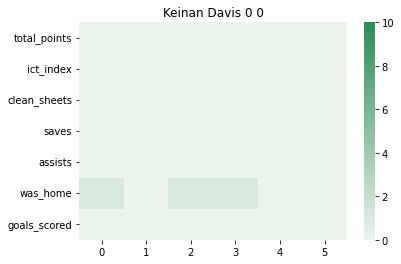

Player in Ollie Watkins. 5.566766165633824 To double trade  = False 


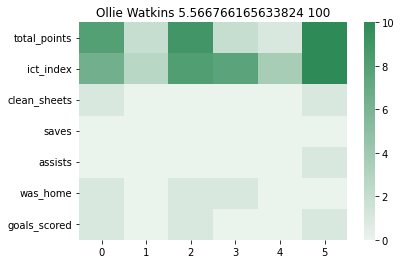

Player out Raheem Sterling. 0 To double trade  = False 


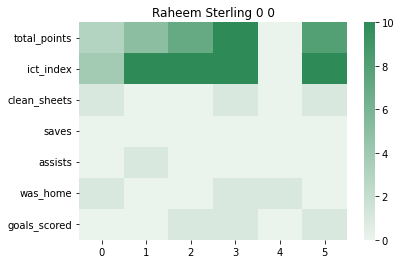

Player in Bukayo Saka. 4.911604015626353 To double trade  = False 


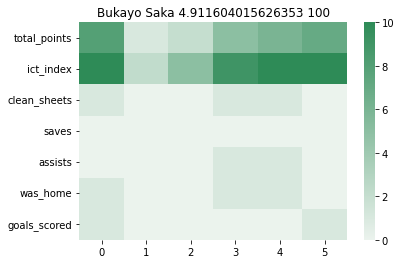

In [3]:
current_squad, non_squad = await get_current_squad(features, window=agent.window, num_players=agent.num_players)
current_squad, non_squad = await agent.get_new_squad(features)
squad = current_squad + non_squad

In [4]:

#agent.get_wildcard_squad(squad, max_weight=1000, visualize=False)

## Show game week id

In [5]:
agent.gameweek, current_squad[0]

(<coroutine object get_latest_game_week at 0x7f3c2036dd40>,
 <player.Player at 0x7f3cf5113610>)

## Use model to swap players

## Set playing 11

In [6]:
await agent.set_playing_11(current_squad, visualize=False)

## Highlight top performers by position for this week





Goalkeeper
David de Gea


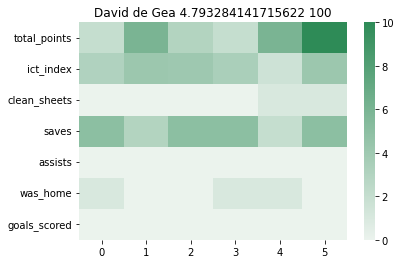

Lukasz Fabianski


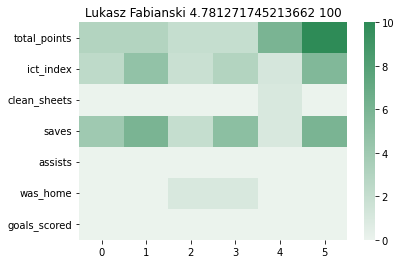

Nick Pope


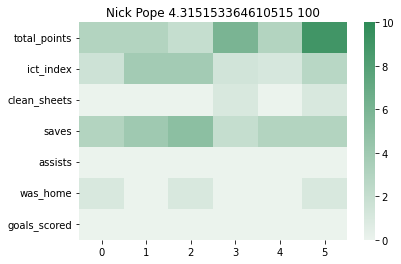

Jordan Pickford


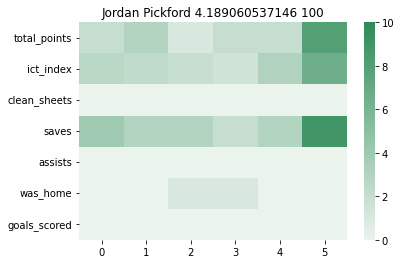

Illan Meslier


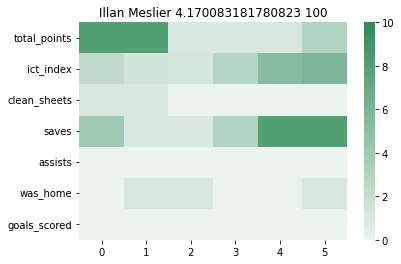










Defender
Trent Alexander-Arnold


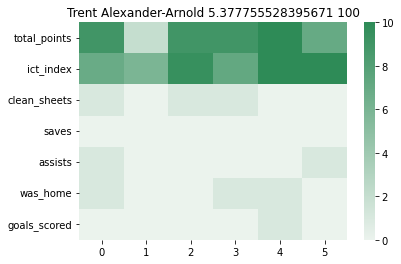

Andrew Robertson


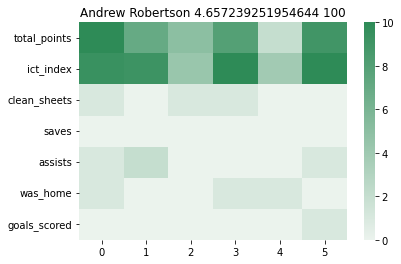

Rúben Santos Gato Alves Dias


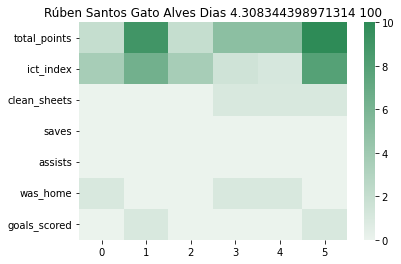

Marcos Alonso


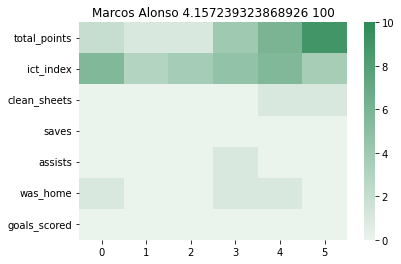

Takehiro Tomiyasu


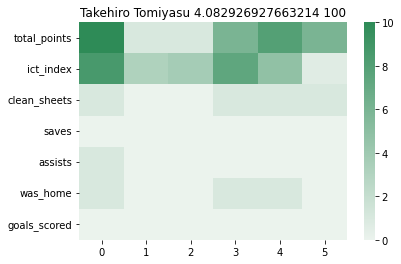










Midfielder
Gabriel Teodoro Martinelli Silva


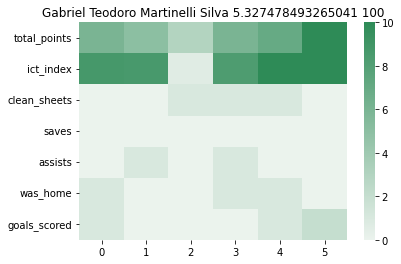

Mason Mount


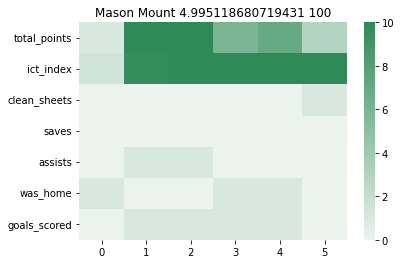

Martin Ødegaard


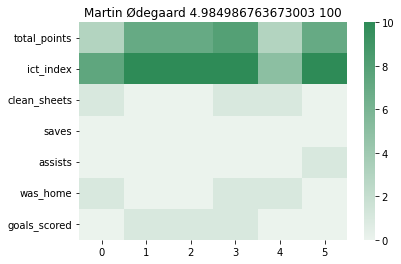

Bukayo Saka


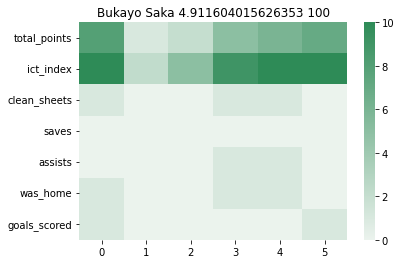

Mohamed Salah


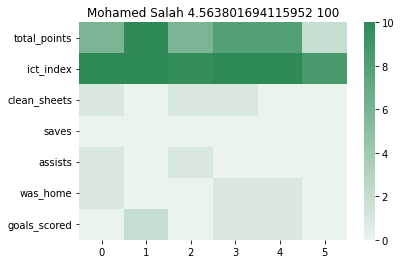










Forward
Ollie Watkins


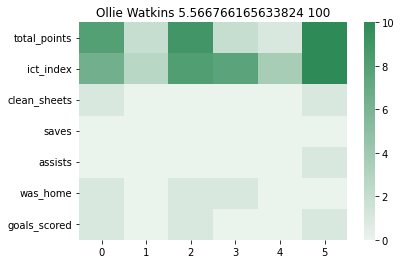

Cristiano Ronaldo dos Santos Aveiro


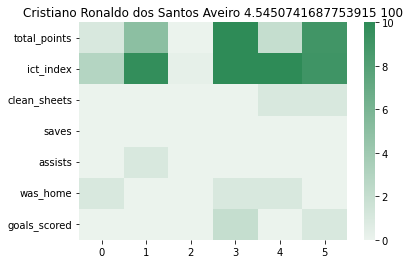

Emmanuel Dennis


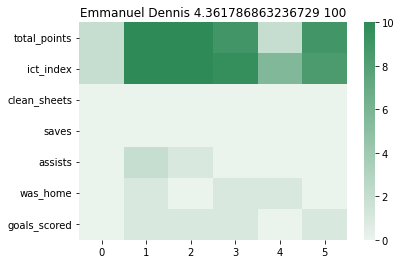

Harry Kane


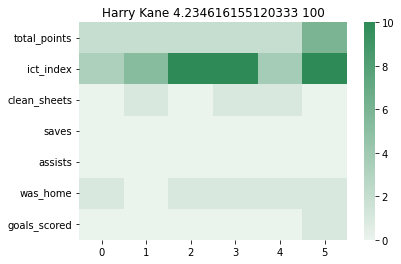

Alexandre Lacazette


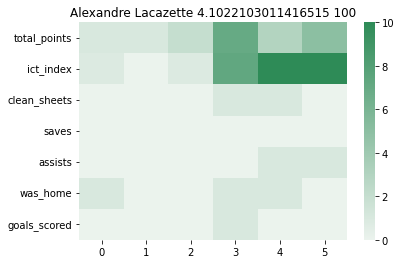

In [7]:
agent.show_top_performers(current_squad + non_squad, k=5)